In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

# Section A - Data Exploration & Visualization

### A1

In [5]:

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

qualityForR = wine_quality.data.targets

# Combine features and target into a single DataFrame
wine_data = pd.concat([X, y], axis=1)

# Print metadata and variable information
print("Metadata:")
print(wine_quality.metadata)
print("Variable information:")
print(wine_quality.variables)

Metadata:
{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining fro

In [6]:
# Number of rows in the DataFrame
num_rows = wine_data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 6497


In [7]:
# Print column names to ensure they are correct
print("Column names:")
print(wine_data.columns)


Column names:
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
# Ensure Seaborn style is used for plots
sns.set(style="whitegrid")

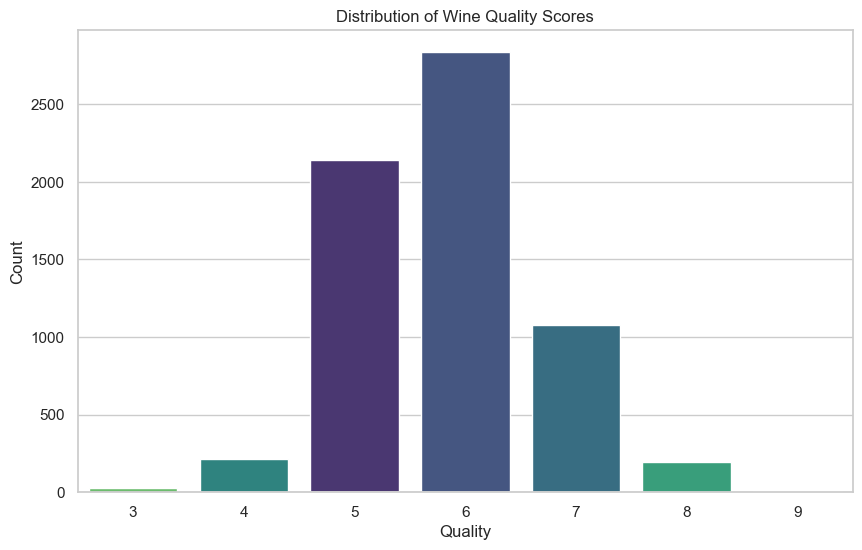

In [9]:
# 1. Distribution of wine quality scores
wine_data['quality'] = wine_data['quality'].astype(str)

quality_order = sorted(wine_data['quality'].unique())

plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis', hue='quality', dodge=False, order=quality_order)
plt.legend().remove()  

plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.show()


This graph shows the distribution of wine quality scores ranging from 3 to 9. The most common quality scores are around 5 and 6, indicating that the majority of the wine samples are of average quality. Very few samples are rated extremely high or low, suggesting a bell-curve distribution in wine quality ratings.

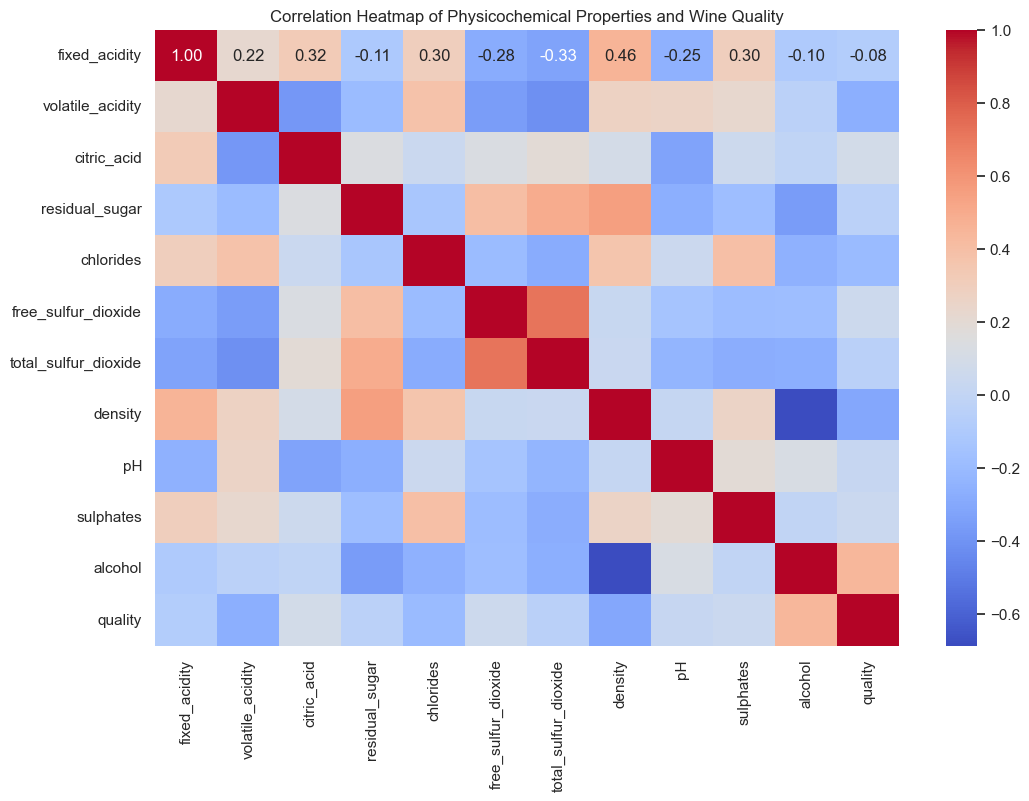

In [11]:
# 2. Correlation heatmap of physicochemical properties and wine quality
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Physicochemical Properties and Wine Quality')
plt.show()

The heatmap reveals the correlation between different physicochemical properties and wine quality. Notable correlations include a positive correlation between alcohol content and quality, and a negative correlation between volatile acidity and quality. This suggests that higher alcohol content is associated with better wine quality, while higher volatile acidity is associated with lower quality.

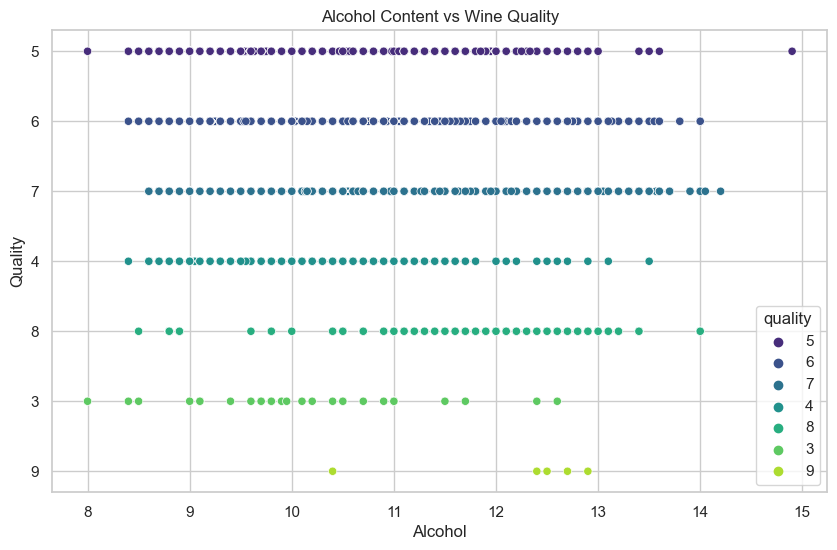

In [13]:
# 3. Scatter plot of alcohol content vs quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine_data, hue='quality', palette='viridis')
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

The scatter plot shows a positive relationship between alcohol content and wine quality. Higher quality wines tend to have higher alcohol content. This indicates that alcohol content is a significant factor in determining the quality of the wine samples.

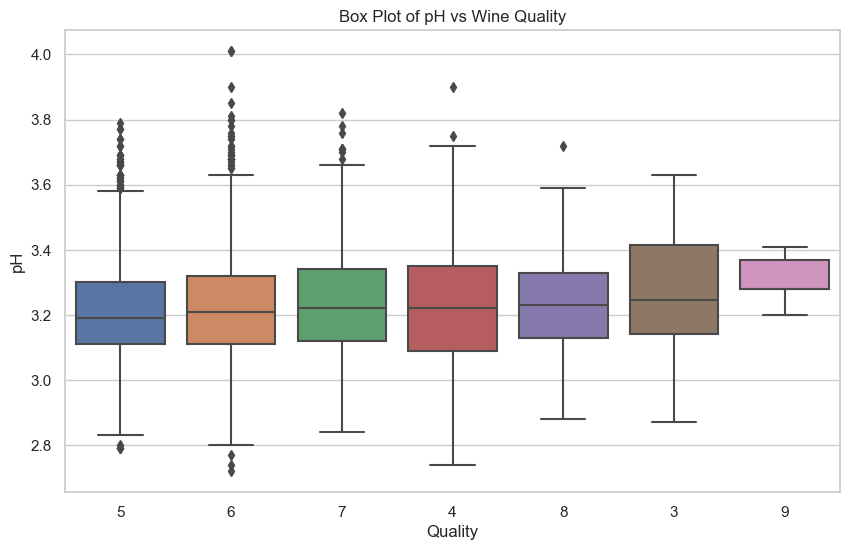

In [15]:
# 4. Box plot of pH vs quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=wine_data)
plt.title('Box Plot of pH vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

The box plot illustrates the distribution of pH values across different wine quality scores. While there is some variation, the median pH values are relatively consistent across different quality levels. This suggests that pH may not be a strong determinant of wine quality.

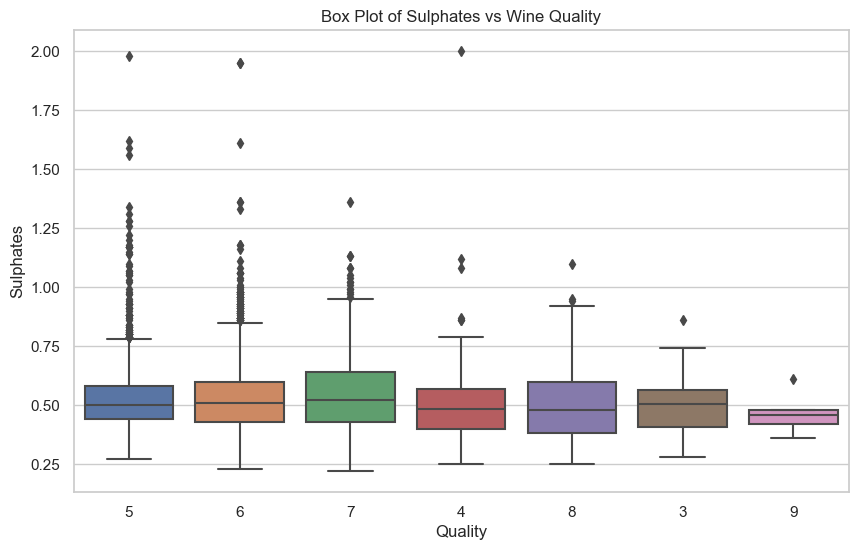

In [17]:
# 7. Box Plot of Sulphates vs Wine Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='sulphates', data=wine_data)
plt.title('Box Plot of Sulphates vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.show()

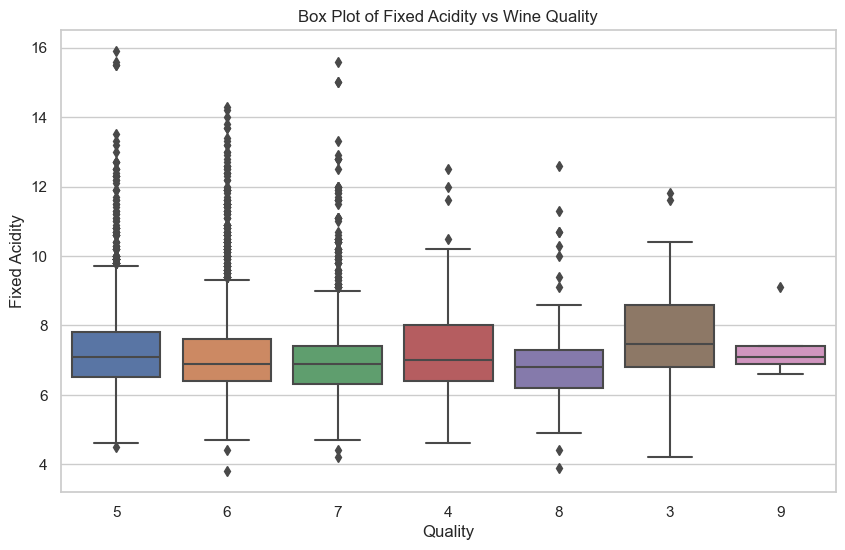

In [18]:
# 8. Box Plot of Fixed Acidity vs Wine Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed_acidity', data=wine_data)
plt.title('Box Plot of Fixed Acidity vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

### Additional Visualizations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


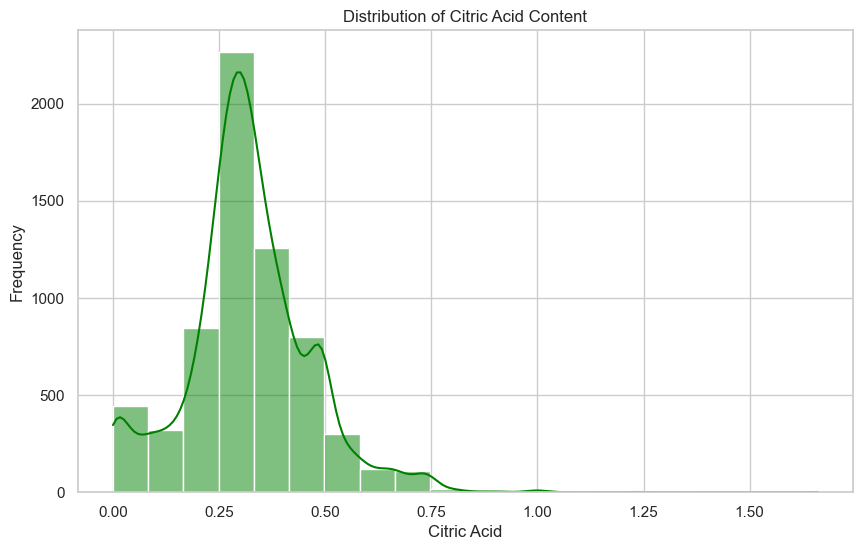

In [20]:
# 1. Histogram of Citric Acid Content
plt.figure(figsize=(10, 6))
sns.histplot(wine_data['citric_acid'], bins=20, kde=True, color='green')
plt.title('Distribution of Citric Acid Content')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

#### Question Addressed: What is the distribution of citric acid content in the wine samples?
This histogram shows the distribution of citric acid content across all wine samples. It reveals whether the majority of wines have high or low citric acid levels. For instance, if the distribution is skewed towards lower values, it indicates that most wines have low citric acid content.

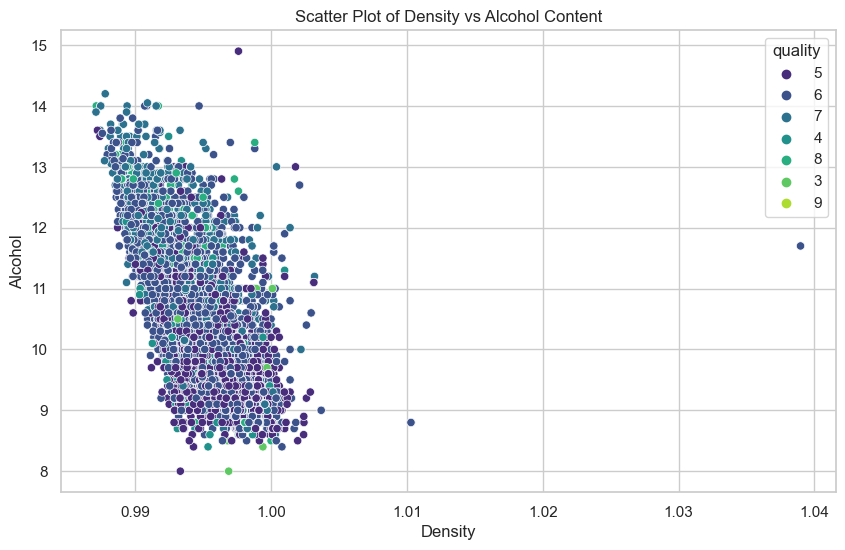

In [22]:
# 2. Scatter Plot of Density vs. Alcohol Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data=wine_data, hue='quality', palette='viridis')
plt.title('Scatter Plot of Density vs Alcohol Content')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

#### Question Addressed: Is there a relationship between the density and alcohol content of the wines?
This scatter plot reveals the relationship between density and alcohol content. By coloring the points by wine quality, we can see if certain density and alcohol combinations are more common in higher quality wines. For instance, if higher quality wines cluster at specific density and alcohol values, it suggests that these properties are important indicators of quality.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


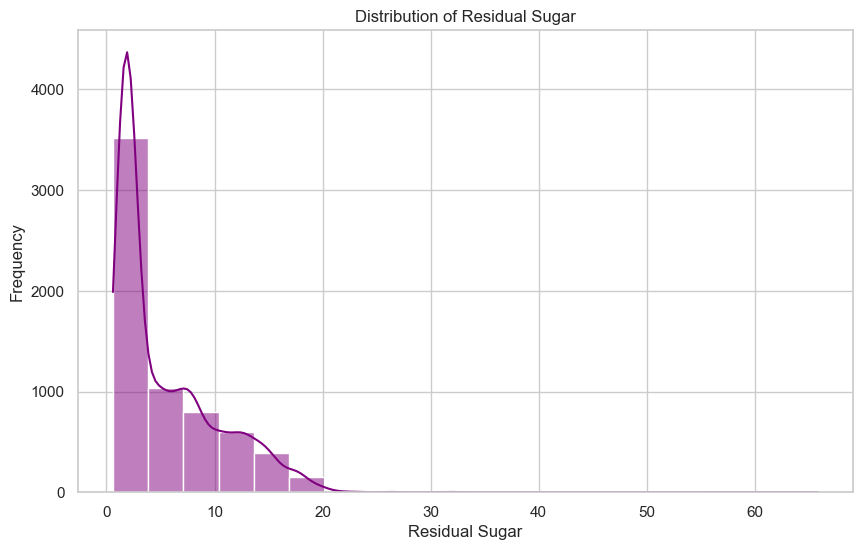

In [24]:
# 3. Distribution of residual sugar
plt.figure(figsize=(10, 6))
sns.histplot(wine_data['residual_sugar'], bins=20, kde=True, color='purple')
plt.title('Distribution of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()


#### Question Addressed: What is the distribution of residual sugar content in the wine samples?

### A2

First, make sure there are no missing values:

In [28]:
# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


As we can see, there are no missing values ​​and therefore we can move forward.  
The next step that can be essential is the normalization of the data that will be in the same range, since the models we will work with will be eraser-based.

In [30]:
features_to_normalize = ['residual_sugar','fixed_acidity', 'free_sulfur_dioxide', 'pH', 'total_sulfur_dioxide', 'alcohol']# Normalize only the required features
scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized[features_to_normalize] = scaler.fit_transform(X[features_to_normalize])

# Print normalized data summary
print("Normalized Data Summary:\n", X_normalized.head())


Normalized Data Summary:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521              0.70         0.00        0.019939      0.076   
1       0.330579              0.88         0.00        0.030675      0.098   
2       0.330579              0.76         0.04        0.026074      0.092   
3       0.611570              0.28         0.56        0.019939      0.075   
4       0.297521              0.70         0.00        0.019939      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density        pH  sulphates  \
0             0.034722              0.064516   0.9978  0.612403       0.56   
1             0.083333              0.140553   0.9968  0.372093       0.68   
2             0.048611              0.110599   0.9970  0.418605       0.65   
3             0.055556              0.124424   0.9980  0.341085       0.58   
4             0.034722              0.064516   0.9978  0.612403       0.56   

    alcohol  
0  0.202899  
1  0.260

In [31]:
# Feature 1: Sulfur Dioxide Ratio
X_normalized['sulfur_dioxide_ratio'] = X_normalized['free_sulfur_dioxide'] /(1+ X_normalized['total_sulfur_dioxide'])

# Feature 2: Acid Index
X_normalized['acid_index'] = X_normalized['volatile_acidity'] /(1+ X_normalized['alcohol'])

# Print normalized data summary with new features
print("Normalized Data with Engineered Features Summary:\n", X_normalized.head())

Normalized Data with Engineered Features Summary:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521              0.70         0.00        0.019939      0.076   
1       0.330579              0.88         0.00        0.030675      0.098   
2       0.330579              0.76         0.04        0.026074      0.092   
3       0.611570              0.28         0.56        0.019939      0.075   
4       0.297521              0.70         0.00        0.019939      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density        pH  sulphates  \
0             0.034722              0.064516   0.9978  0.612403       0.56   
1             0.083333              0.140553   0.9968  0.372093       0.68   
2             0.048611              0.110599   0.9970  0.418605       0.65   
3             0.055556              0.124424   0.9980  0.341085       0.58   
4             0.034722              0.064516   0.9978  0.612403       0.56   

    alcohol

#### Ratio of Sulfur Dioxide:  
Wines have both free and total sulfur dioxide, which are important for preserving wine but can impact flavor if they are not balanced. The free sulfur dioxide to total sulfur dioxide ratio may give an idea of how well the wine is preserved without dominating the taste.

Calculation: sulfur_dioxide_ratio = free_sulfur_dioxide / total_sulfur_dioxie

Rationale: A large ratio could mean better preservation with little effect on taste and this could be related to highest quality wines.

#### Acid Index:
This parameter could represent a balance between acidity and alcohol essential for overall taste and quality of wines. It may be derived as a feature by combining volatile acidity and alcohol content.

Calculation: acid_index = volatile_acidity / alcohol

Rationale: The relationship between these two attributes is critical in achieving the taste profile of wine, whilst the right balance might indicate superior products.

#### In the next step, we will deal with outlines ​​that can affect the predictive quality of the models later

In [35]:
# Set the lower and upper percentile thresholds
lower_percentile = 0.03  # 3st percentile
upper_percentile = 0.97  # 97th percentile

# Calculate the lower and upper percentile values for each feature
lower_bounds = X_normalized.quantile(lower_percentile)
upper_bounds = X_normalized.quantile(upper_percentile)

# Capping the outliers based on percentile thresholds
X_normalized_capped = X_normalized.copy()

for col in X_normalized.columns:
    # Cap the values below the lower percentile
    X_normalized_capped[col] = np.where(X_normalized_capped[col] < lower_bounds[col], 
                                        lower_bounds[col], 
                                        X_normalized_capped[col])
    
    # Cap the values above the upper percentile
    X_normalized_capped[col] = np.where(X_normalized_capped[col] > upper_bounds[col], 
                                        upper_bounds[col], 
                                        X_normalized_capped[col])

# Display capped data summary
print("Capped Data Summary (with percentiles handled):\n", X_normalized_capped.head())


Capped Data Summary (with percentiles handled):
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521             0.700         0.02        0.019939      0.076   
1       0.330579             0.735         0.02        0.030675      0.098   
2       0.330579             0.735         0.04        0.026074      0.092   
3       0.553719             0.280         0.56        0.019939      0.075   
4       0.297521             0.700         0.02        0.019939      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density        pH  sulphates  \
0             0.034722              0.064516   0.9978  0.612403       0.56   
1             0.083333              0.140553   0.9968  0.372093       0.68   
2             0.048611              0.110599   0.9970  0.418605       0.65   
3             0.055556              0.124424   0.9980  0.341085       0.58   
4             0.034722              0.064516   0.9978  0.612403       0.56   

    alcohol  

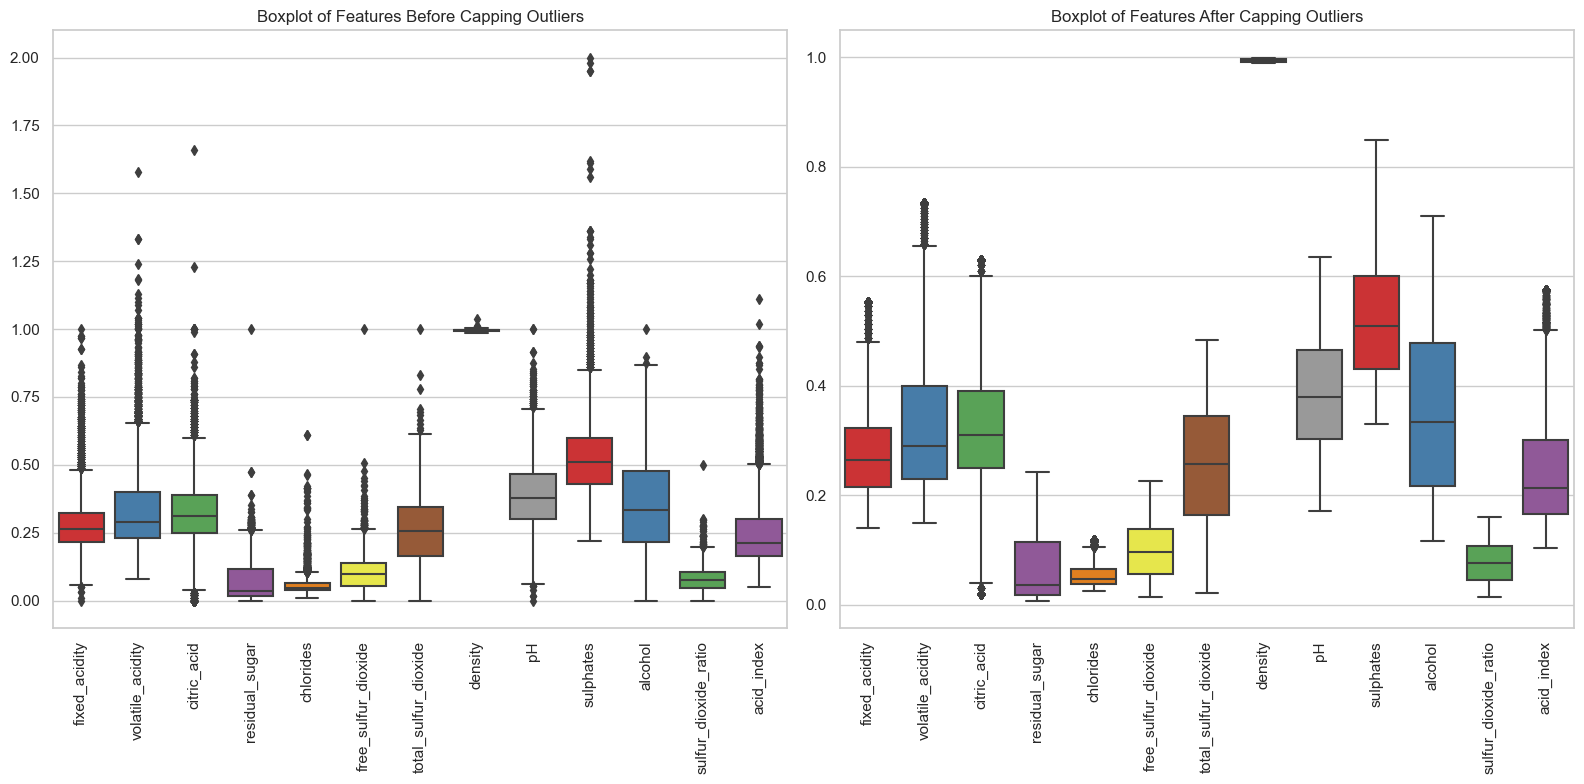

In [36]:
# Visualization before and after capping outliers

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Plot the original data (before capping)
plt.subplot(1, 2, 1)
sns.boxplot(data=X_normalized, palette="Set1")
plt.title("Boxplot of Features Before Capping Outliers")
plt.xticks(rotation=90)

# Plot the data after capping
plt.subplot(1, 2, 2)
sns.boxplot(data=X_normalized_capped, palette="Set1")
plt.title("Boxplot of Features After Capping Outliers")
plt.xticks(rotation=90)

# Display the plots
plt.tight_layout()
plt.show()


### A2-b

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


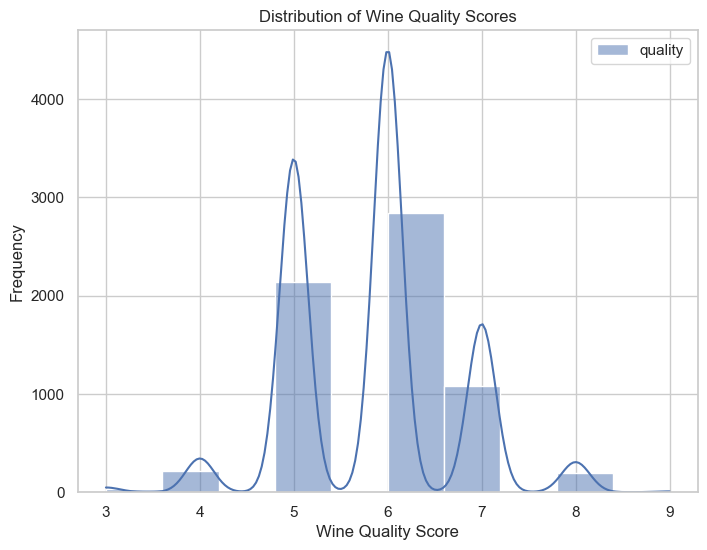

In [38]:
# reminder- the distribution of wine quality scores as we showed in the previous part, it is like this: 
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=10)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Wine Quality Score')
plt.ylabel('Frequency')
plt.show()

# Based on the distribution, decide on the number of categories

In [39]:
# Ensure y is a 1-dimensional array or Series
y_series = y.squeeze()  # Converts DataFrame to Series if y is a DataFrame with one column

# Use quantiles to ensure categories are almost equally represented
quality_bins = pd.qcut(y_series, q=3, labels=["Low", "Medium", "High"])

# Add the new categorical feature to the dataset
X_normalized_capped['quality_category'] = quality_bins

# Check the distribution of the new categorical feature
category_distribution = X_normalized_capped['quality_category'].value_counts()
print("Category Distribution:\n", category_distribution)

# Display the first few rows with the new feature
print("Data with Categorical Quality Feature:\n",X_normalized_capped.head())

Category Distribution:
 quality_category
Medium    2836
Low       2384
High      1277
Name: count, dtype: int64
Data with Categorical Quality Feature:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.297521             0.700         0.02        0.019939      0.076   
1       0.330579             0.735         0.02        0.030675      0.098   
2       0.330579             0.735         0.04        0.026074      0.092   
3       0.553719             0.280         0.56        0.019939      0.075   
4       0.297521             0.700         0.02        0.019939      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density        pH  sulphates  \
0             0.034722              0.064516   0.9978  0.612403       0.56   
1             0.083333              0.140553   0.9968  0.372093       0.68   
2             0.048611              0.110599   0.9970  0.418605       0.65   
3             0.055556              0.124424   0.9980  0.341085    

# Section B - Dimensionality Reduction

### We chose to use the algorithm we learned about in practice: PCA and T-SNE

Let's start from T SNE

In [43]:
# Step 1: Data Preparation 
labels =  X_normalized_capped['quality_category']
features = X_normalized_capped.drop(columns=['quality_category'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

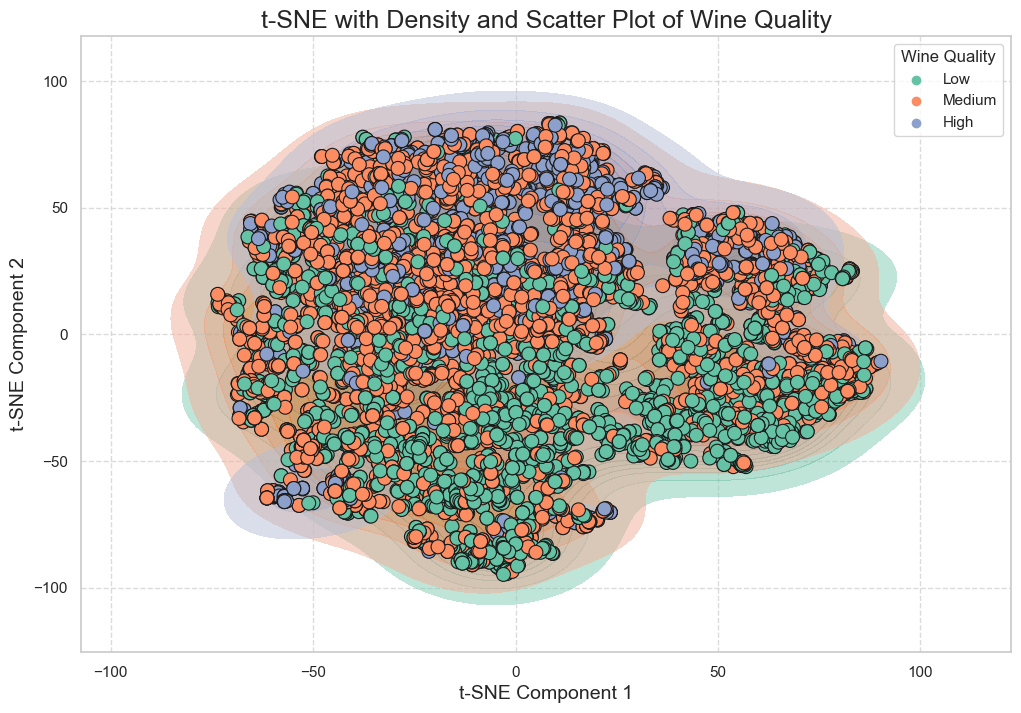

In [44]:
# Step 2: t-SNE Transformation
tsne_model = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne_model.fit_transform(features)

# Step 3: Map Quality Categories to Numerical Values for Plotting
category_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
numeric_labels = labels.map(category_to_num)

# Step 4: Combined Density and Scatter Plot
plt.figure(figsize=(12, 8))

# Create a seaborn kdeplot for density
sns.kdeplot(
    x=tsne_transformed[:, 0], y=tsne_transformed[:, 1], 
    hue=labels, fill=True, palette='Set2', 
    alpha=0.5
)

# Overlay with a scatter plot
sns.scatterplot(
    x=tsne_transformed[:, 0], y=tsne_transformed[:, 1], 
    hue=labels, palette='Set2', 
    edgecolor='k', s=100
)

# Customize the plot
plt.title('t-SNE with Density and Scatter Plot of Wine Quality', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Wine Quality', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

We note that there is not a clear distinction between the divisions of wine quality in general. However, there are obvious disparities between high-quality and low-quality wines, to which they differ widely. Conversely, wines of moderate quality are more scattered; some resemble wines of high quality while others come closer to the poor ones.

2b+c

In [47]:
# Function to calculate feature contribution by removing one feature at a time
def calculate_feature_contributions(features, labels, random_state=42):
    tsne_model = TSNE(n_components=2, random_state=random_state)
    base_tsne = tsne_model.fit_transform(features)
    
    distances = []
    
    for feature in features.columns:
        reduced_features = features.drop(columns=[feature])
        tsne_result = tsne_model.fit_transform(reduced_features)
        dist = pairwise_distances(base_tsne, tsne_result).mean()
        distances.append((feature, dist))
    
    return sorted(distances, key=lambda x: x[1], reverse=True)

# Apply the function to calculate contributions
feature_contributions = calculate_feature_contributions(X_normalized_capped.drop(columns=['quality_category']), labels)

# Display the contributions
print("Feature Contributions to t-SNE Separation (Higher = More Important):")
for feature, contribution in feature_contributions:
    print(f"{feature}: {contribution:.4f}")

Feature Contributions to t-SNE Separation (Higher = More Important):
alcohol: 74.3714
volatile_acidity: 74.0930
acid_index: 74.0153
free_sulfur_dioxide: 73.8861
density: 73.8024
sulfur_dioxide_ratio: 73.7031
fixed_acidity: 73.6739
pH: 73.6672
chlorides: 73.5442
total_sulfur_dioxide: 73.3252
residual_sugar: 73.3110
citric_acid: 73.1677
sulphates: 73.1201


In [48]:
print("Based on our analysis, the features that contribute the most to the separation of wine quality in the t-SNE projection are:")
for feature, contribution in feature_contributions[:3]:  # Display top 3 features
    print(f"- {feature}: Contribution Score = {contribution:.4f}")

# Explanation of Findings:
print("\nExplanation:")
print("The most influential features likely play a significant role in the underlying differences between wine quality categories. These features are critical in differentiating between high-quality and low-quality wines.")


Based on our analysis, the features that contribute the most to the separation of wine quality in the t-SNE projection are:
- alcohol: Contribution Score = 74.3714
- volatile_acidity: Contribution Score = 74.0930
- acid_index: Contribution Score = 74.0153

Explanation:
The most influential features likely play a significant role in the underlying differences between wine quality categories. These features are critical in differentiating between high-quality and low-quality wines.


In [49]:
# Display the least effective features
print("Feature Contributions to t-SNE Separation (Lower = Less Important):")
for feature, contribution in feature_contributions[-3:]:  # Display bottom 3 features
    print(f"- {feature}: Contribution Score = {contribution:.4f}")

# Explanation of Findings
print("\nExplanation:")
print("The features listed above contribute the least to the t-SNE separation of wine quality categories. These features have minimal impact on distinguishing between different quality levels of wine, suggesting that they are not significant in determining wine quality.")


Feature Contributions to t-SNE Separation (Lower = Less Important):
- residual_sugar: Contribution Score = 73.3110
- citric_acid: Contribution Score = 73.1677
- sulphates: Contribution Score = 73.1201

Explanation:
The features listed above contribute the least to the t-SNE separation of wine quality categories. These features have minimal impact on distinguishing between different quality levels of wine, suggesting that they are not significant in determining wine quality.


#### Another point: 
In general, after reducing to 2 dimensions, it makes sense that the importance of the features would be relatively similar. That’s why we performed an initial test before proceeding with the reduction. Despite this, a simple calculation can be done to prove this point. In the next algorithm, such as PCA, where the number of dimensions is greater than 2, we can better observe the importance of features after reduction, from which meaningful conclusions can be drawn."

In [51]:
# Prepare the data: t-SNE components and labels
tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE Component 1', 't-SNE Component 2'])
labels_numeric = labels.map({'Low': 0, 'Medium': 1, 'High': 2})

# Step 2: Train logistic regression models for each component separately
model_1 = LogisticRegression(max_iter=1000)  # t-SNE Component 1
model_2 = LogisticRegression(max_iter=1000)  # t-SNE Component 2

# Evaluate using cross-validation
score_1 = np.mean(cross_val_score(model_1, tsne_df[['t-SNE Component 1']], labels_numeric, cv=5))
score_2 = np.mean(cross_val_score(model_2, tsne_df[['t-SNE Component 2']], labels_numeric, cv=5))

# Output the importance scores
print(f"Cross-validated accuracy using t-SNE Component 1: {score_1:.4f}")
print(f"Cross-validated accuracy using t-SNE Component 2: {score_2:.4f}")

Cross-validated accuracy using t-SNE Component 1: 0.4293
Cross-validated accuracy using t-SNE Component 2: 0.5252


The results explain what we thought would happen, the factors are relatively balanced in their level of importance. It can be seen that component 2 received slightly higher results

2d:

In [54]:
# Step 1: Calculate correlations between each feature and the t-SNE components
tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE Component 1', 't-SNE Component 2'])
correlations = X_normalized_capped.drop(columns=['quality_category']).apply(lambda x: tsne_df.corrwith(x))

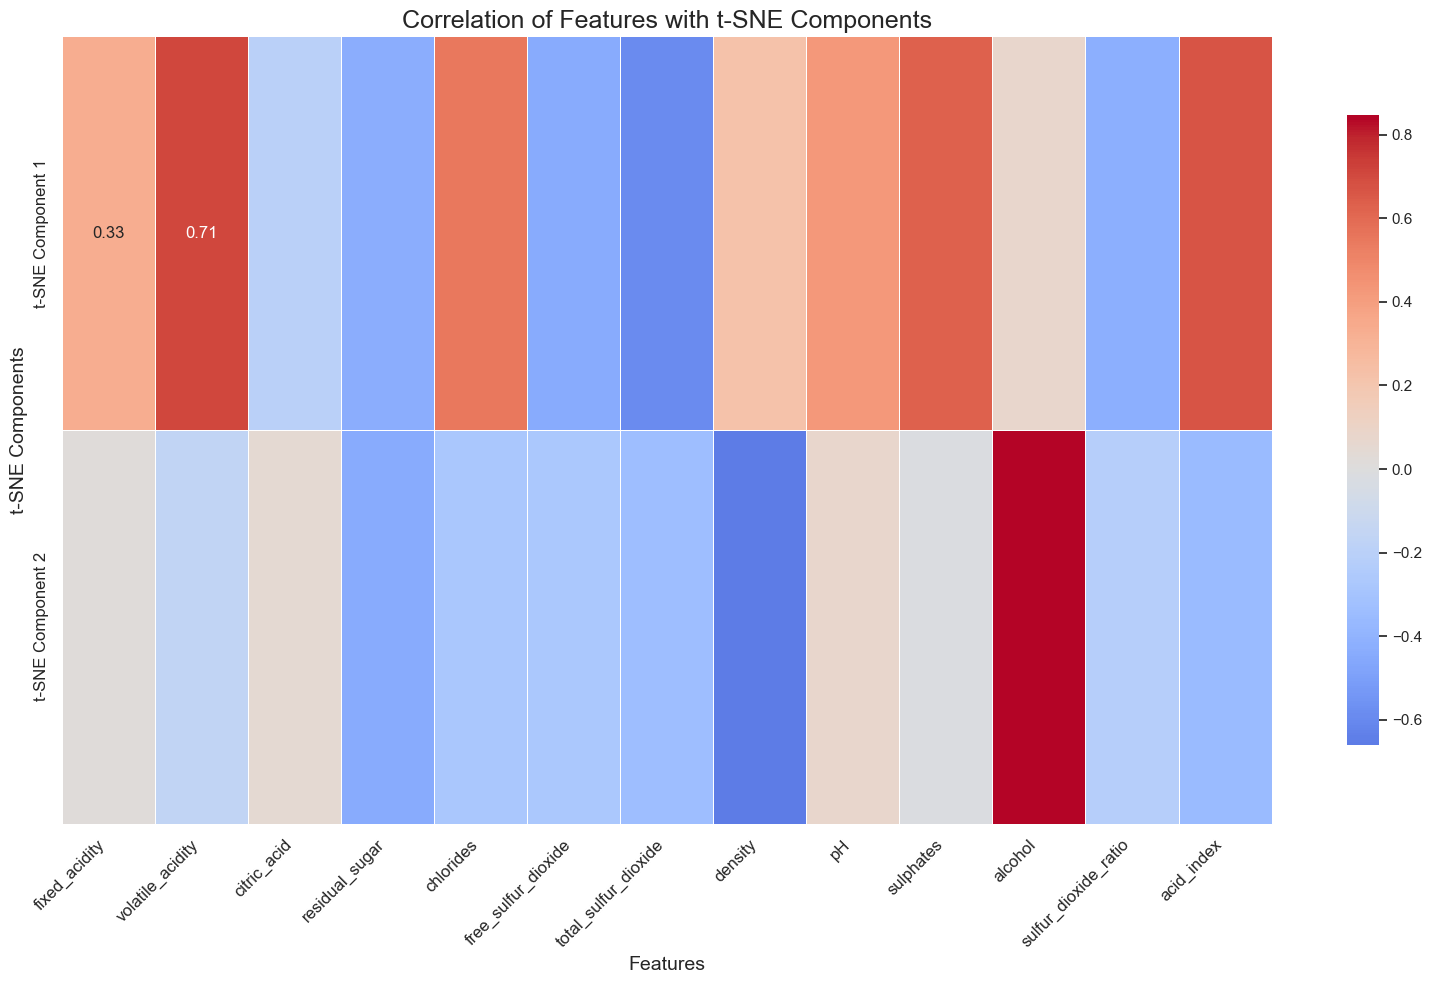

In [55]:
# Adjust the figure size for better readability
plt.figure(figsize=(16, 10))

# Heatmap of correlations with adjusted parameters for better readability
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, 
            annot_kws={"size": 12}, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.8})

# Customize the plot for readability
plt.title('Correlation of Features with t-SNE Components', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('t-SNE Components', fontsize=14)
plt.tight_layout()

plt.show()

t-SNE Component 1 shows a strong positive correlation with features like volatile acidity (0.71) and alcohol (0.67), indicating that these features are particularly important to this component. It also has moderate positive correlations with chlorides (0.55) and sulphates (0.63). On the other hand, it displays a negative correlation with features such as residual sugar (-0.43) and free sulfur dioxide (-0.44), indicating that these features are less important or inversely related to this component.

t-SNE Component 2 has a strong positive correlation with alcohol (0.85), making this feature the most significant for this component. It also shows moderate negative correlations with density (-0.66) and volatile acidity (-0.16). Other features like fixed acidity (0.02) and chlorides (-0.28) show weak or no significant correlation, suggesting they are less important for t-SNE Component 2.

#### pca 

In [58]:
#  Apply PCA 
pca_model = PCA(n_components=5)  # Retain the top 5 components
pca_transformed = pca_model.fit_transform(features)

In [59]:
#  Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])


In [60]:
#  Map quality categories to numerical values for plotting
category_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
numeric_labels = labels.map(category_to_num)

2-a

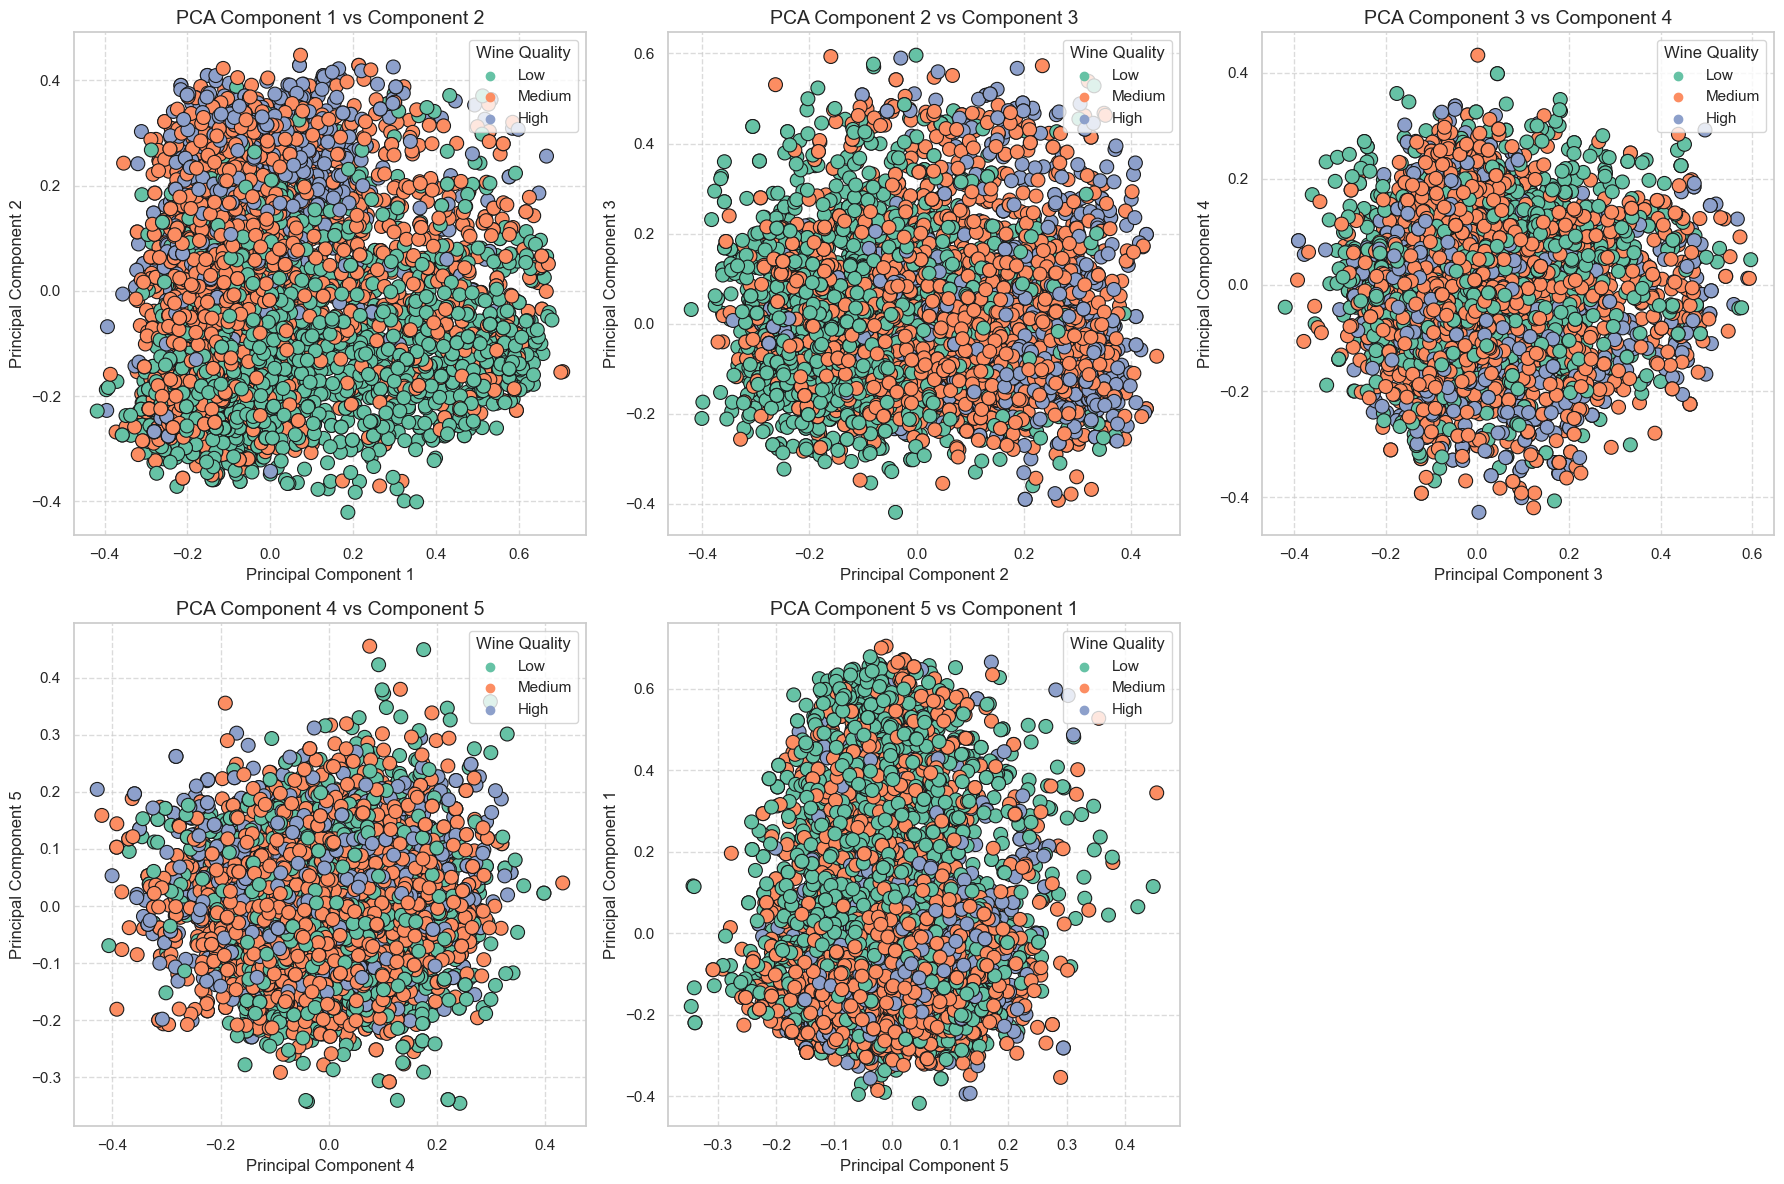

In [62]:
#  Scatter Plot of the first 5 PCA components
plt.figure(figsize=(18, 12))
for i in range(1, 6):  # Iterate over the first 5 principal components
    plt.subplot(2, 3, i)
    sns.scatterplot(
        x=pca_df[f'PC{i}'], y=pca_df[f'PC{i+1}' if i < 5 else 'PC1'], 
        hue=labels, palette='Set2', 
        edgecolor='k', s=100
    )
    plt.title(f'PCA Component {i} vs Component {i+1 if i < 5 else 1}', fontsize=14)
    plt.xlabel(f'Principal Component {i}', fontsize=12)
    plt.ylabel(f'Principal Component {i+1 if i < 5 else 1}', fontsize=12)
    plt.legend(title='Wine Quality', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In the scatter plots, each pair of principal components (PCs) from the PCA analysis illustrates the distribution of wine quality categories (Low, Medium, High). The plot of PCA Component 1 versus PCA Component 2 offers the best differentiation between the wine quality categories.

In this plot, `Low` quality wines cluster on one side, and `High` quality wines on the opposite side, indicating that these components capture significant variance related to wine quality. However, there is still considerable overlap, particularly with `Medium` quality wines, suggesting that while these components are effective, the separation isn't entirely distinct, reflecting the complexity of wine quality.

The other plots show even greater overlap between the categories, emphasizing that PCA Components 1 and 2 are the most critical in explaining the variance related to wine quality.

2- b+c

In [65]:
# Identify the most and least effective features in every component
loadings = pd.DataFrame(pca_model.components_.T, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])], index=X_normalized_capped.columns[:-1])

# Most effective features for each component
print("Most effective features for each principal component:")
for i in range(5):  # Iterate over the first 5 components
    most_important_features = loadings.iloc[:, i].abs().nlargest(3).index.tolist()
    print(f"\nPrincipal Component {i+1}:")
    for feature in most_important_features:
        print(f"- {feature}")

# Least effective features for each component
print("\nLeast effective features for each principal component:")
for i in range(5):  # Iterate over the first 5 components
    least_important_features = loadings.iloc[:, i].abs().nsmallest(3).index.tolist()
    print(f"\nPrincipal Component {i+1}:")
    for feature in least_important_features:
        print(f"- {feature}")


Most effective features for each principal component:

Principal Component 1:
- volatile_acidity
- acid_index
- total_sulfur_dioxide

Principal Component 2:
- alcohol
- total_sulfur_dioxide
- acid_index

Principal Component 3:
- citric_acid
- sulphates
- fixed_acidity

Principal Component 4:
- sulphates
- pH
- volatile_acidity

Principal Component 5:
- total_sulfur_dioxide
- volatile_acidity
- alcohol

Least effective features for each principal component:

Principal Component 1:
- density
- alcohol
- chlorides

Principal Component 2:
- citric_acid
- density
- chlorides

Principal Component 3:
- acid_index
- density
- volatile_acidity

Principal Component 4:
- density
- chlorides
- residual_sugar

Principal Component 5:
- density
- chlorides
- pH


In [66]:
# Step 1: Fit a Logistic Regression Model using all PCA components
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, pca_transformed, labels, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {scores.mean():.4f}")

# Step 2: Fit the model and get coefficients for each component
model.fit(pca_transformed, labels)
component_importance = np.abs(model.coef_).mean(axis=0)

# Step 3: Identify the most and least important components
most_important_component = np.argmax(component_importance) + 1  # Adding 1 to match component numbering
least_important_component = np.argmin(component_importance) + 1  # Adding 1 to match component numbering

print(f"The most important component according to the prediction model is PC{most_important_component}.")
print(f"The least important component according to the prediction model is PC{least_important_component}.")

# Step 4: Extract Feature Loadings
loadings = pd.DataFrame(pca_model.components_.T, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])], index=X_normalized_capped.columns[:-1])

# Most effective features in the most important component
most_effective_features = loadings[f'PC{most_important_component}'].abs().nlargest(3).index.tolist()
print(f"\nMost effective features for separating wine quality (PC{most_important_component}):")
for feature in most_effective_features:
    print(f"- {feature}")

# Least effective features in the least important component
least_effective_features = loadings[f'PC{least_important_component}'].abs().nsmallest(3).index.tolist()
print(f"\nLeast effective features for separating wine quality (PC{least_important_component}):")
for feature in least_effective_features:
    print(f"- {feature}")

Cross-validated accuracy: 0.5227
The most important component according to the prediction model is PC2.
The least important component according to the prediction model is PC3.

Most effective features for separating wine quality (PC2):
- alcohol
- total_sulfur_dioxide
- acid_index

Least effective features for separating wine quality (PC3):
- acid_index
- density
- volatile_acidity


#### We can also see this using a bar chart

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


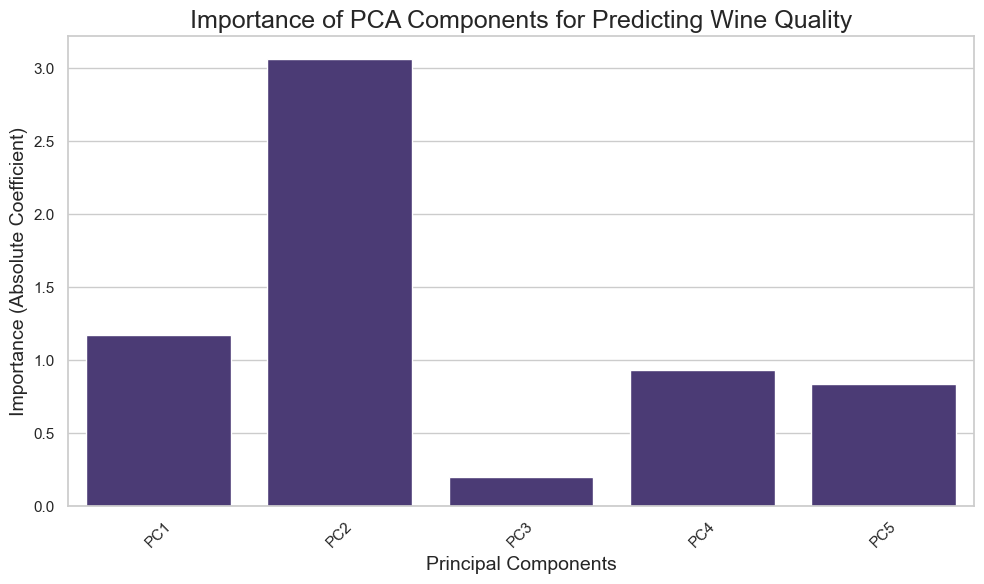

In [68]:
component_names = [f'PC{i+1}' for i in range(len(component_importance))]

# Step 5: Visualization of Component Importance
plt.figure(figsize=(10, 6))

# You can remove 'palette' to avoid the warning
sns.barplot(x=component_names, y=component_importance, color=sns.color_palette('viridis')[0])

plt.title('Importance of PCA Components for Predicting Wine Quality', fontsize=18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Importance (Absolute Coefficient)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It can be seen that PC2 and PC4 indeed the best vs PC1 or PC5

2-d

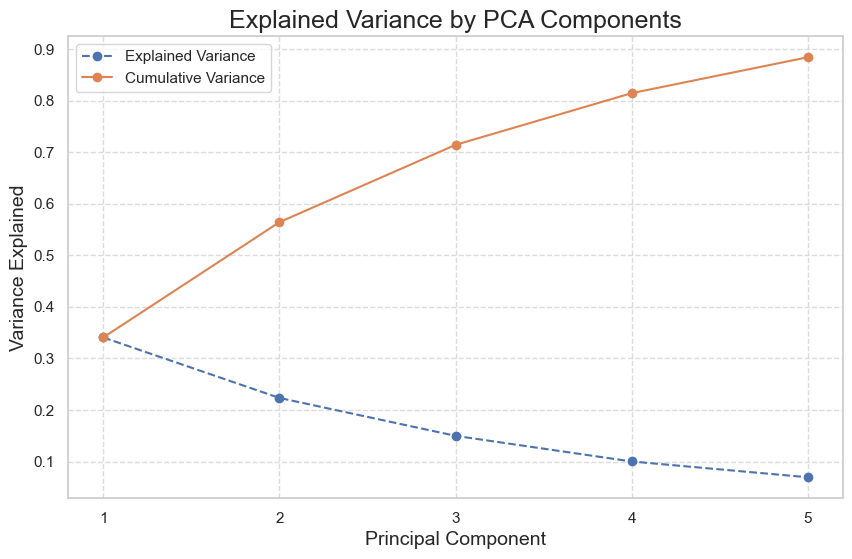


Cumulative variance explained by the first 5 components:
PC1: 0.3407
PC2: 0.5643
PC3: 0.7142
PC4: 0.8145
PC5: 0.8841


In [71]:
# Explained Variance Ratio
explained_variance = pca_model.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), explained_variance[:5], marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, 6), cumulative_variance[:5], marker='o', label='Cumulative Variance')
plt.title('Explained Variance by PCA Components', fontsize=18)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Variance Explained', fontsize=14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nCumulative variance explained by the first 5 components:")
for i, variance in enumerate(cumulative_variance[:5], start=1):
    print(f"PC{i}: {variance:.4f}")

The graph shows that the first few principal components (PCs) explain the majority of the variance in the dataset, with the first component being the most significant. As more components are added, the cumulative variance approaches a plateau, indicating that a smaller number of components captures most of the data's variability.

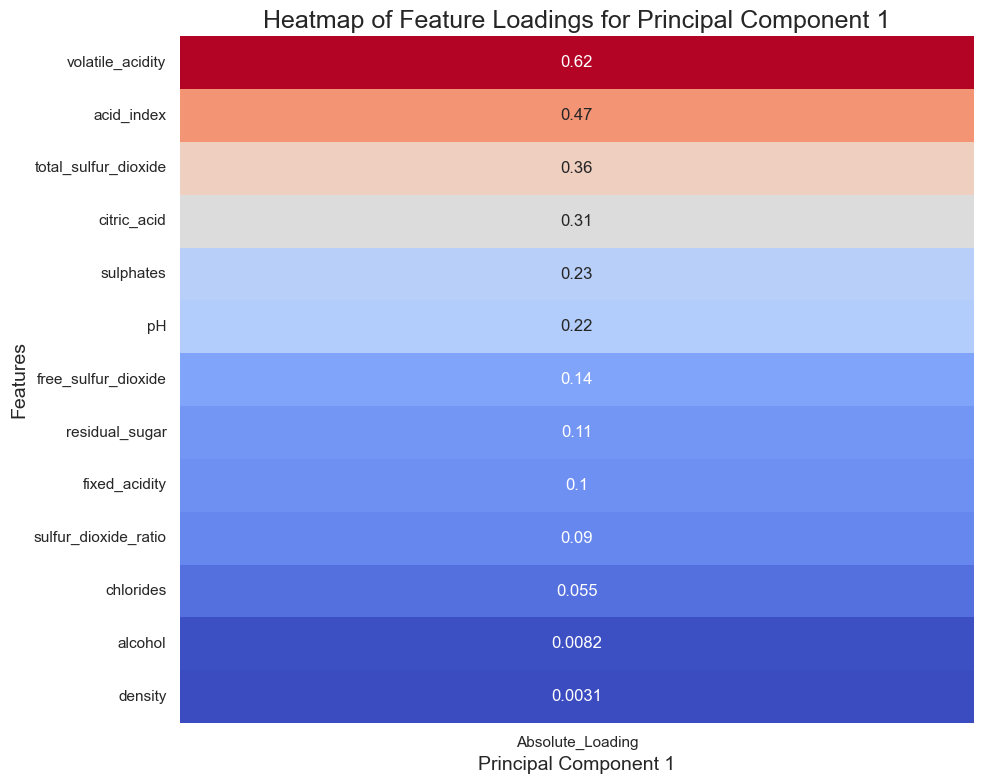

In [73]:
# Step 1: Extract the loadings for the first principal component (PC1)
loadings_pc1 = pca_model.components_[0]  # PC1 corresponds to the first row in the components_ array
feature_names = X_normalized_capped.columns[:-1]  # Assuming 'quality_category' is the last column

# Step 2: Create a DataFrame to hold the loadings for better readability
loadings_df = pd.DataFrame(loadings_pc1, index=feature_names, columns=['PC1_Loading'])

# Step 3: Sort the loadings by absolute value
loadings_df['Absolute_Loading'] = loadings_df['PC1_Loading'].abs()
sorted_loadings_df = loadings_df.sort_values(by='Absolute_Loading', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_loadings_df[['Absolute_Loading']], annot=True, cmap='coolwarm', cbar=False)
plt.title('Heatmap of Feature Loadings for Principal Component 1', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

### B3

The best results were from the PCA, so we will run it again according to the instructions. We will drop total_sulfur_dioxide as it is the most effective feature

In [76]:
# Remove the most effective feature identified from PCA
features_reduced = features.drop(columns=['total_sulfur_dioxide']) 

In [77]:
# Apply PCA again without the most effective feature
pca_model_reduced = PCA(n_components=5)
pca_transformed_reduced = pca_model_reduced.fit_transform(features_reduced)


In [78]:
# Create a DataFrame for PCA components
pca_df_reduced = pd.DataFrame(pca_transformed_reduced, columns=[f'PC{i+1}' for i in range(pca_transformed_reduced.shape[1])])


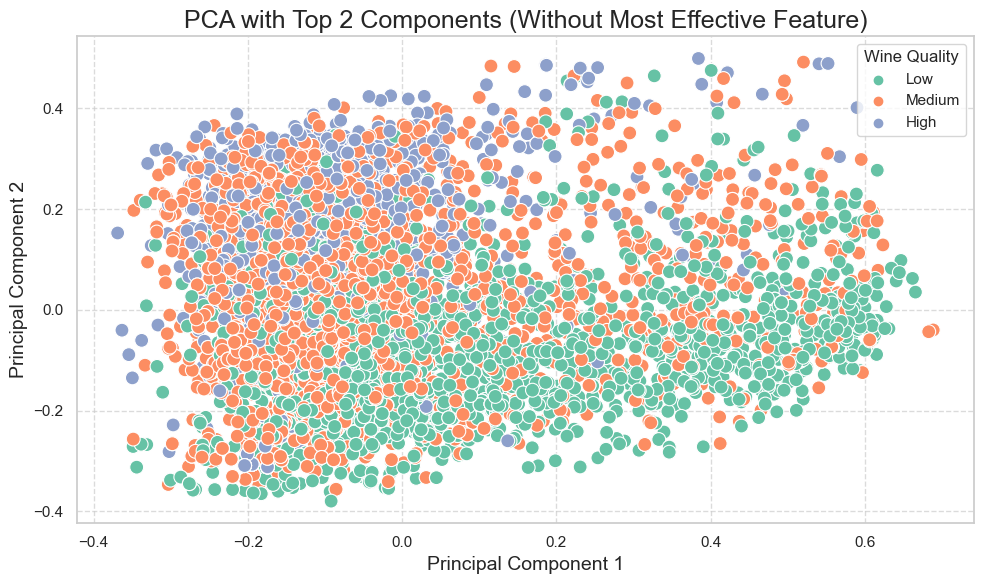

In [79]:
# Step 4: Visualize the PCA result without the most effective feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_reduced['PC1'], y=pca_df_reduced['PC2'], hue=labels, palette='Set2', s=100)
plt.title('PCA with Top 2 Components (Without Most Effective Feature)', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Wine Quality', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cross-validated accuracy without 'total_sulfur_dioxide': 0.5273
The most important component after removing 'total_sulfur_dioxide' is PC2.
The least important component after removing 'total_sulfur_dioxide' is PC3.

Most effective features for separating wine quality (after removing 'total_sulfur_dioxide') in PC2:
- alcohol
- pH
- residual_sugar

Least effective features for separating wine quality (after removing 'total_sulfur_dioxide') in PC3:
- density
- chlorides
- acid_index


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


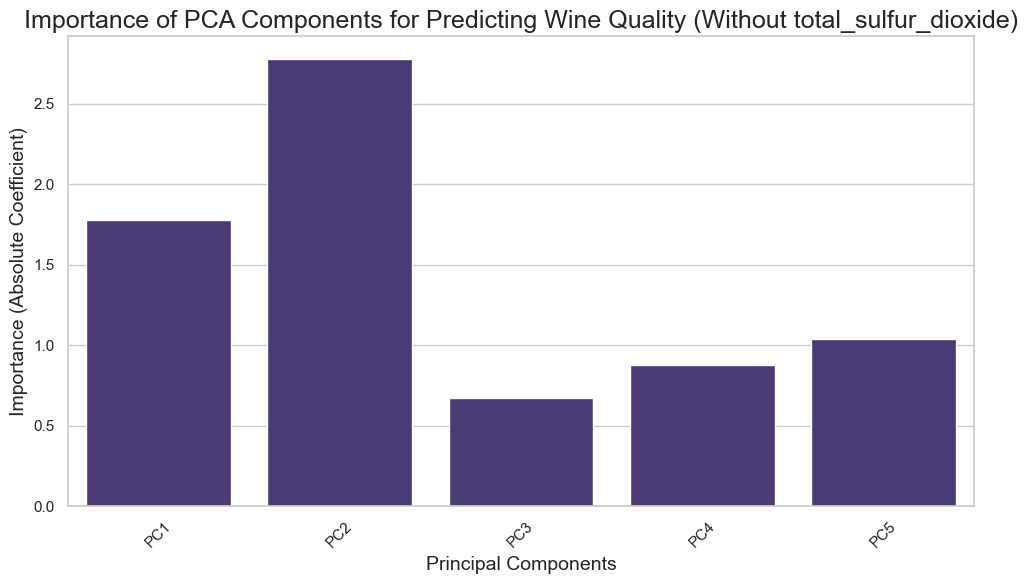

In [80]:
# Step 3: Fit a Logistic Regression Model using the reduced PCA components
model_reduced = LogisticRegression(max_iter=1000)
scores_reduced = cross_val_score(model_reduced, pca_transformed_reduced, labels, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy without 'total_sulfur_dioxide': {scores_reduced.mean():.4f}")

# Step 4: Fit the model and get coefficients for each component
model_reduced.fit(pca_transformed_reduced, labels)
component_importance_reduced = np.abs(model_reduced.coef_).mean(axis=0)

# Step 5: Identify the most and least important components
most_important_component_reduced = np.argmax(component_importance_reduced) + 1
least_important_component_reduced = np.argmin(component_importance_reduced) + 1

print(f"The most important component after removing 'total_sulfur_dioxide' is PC{most_important_component_reduced}.")
print(f"The least important component after removing 'total_sulfur_dioxide' is PC{least_important_component_reduced}.")

# Step 6: Extract Feature Loadings for the reduced dataset
loadings_reduced = pd.DataFrame(pca_model_reduced.components_.T, columns=[f'PC{i+1}' for i in range(pca_transformed_reduced.shape[1])], index=features_reduced.columns)

# Most effective features in the most important component
most_effective_features_reduced = loadings_reduced[f'PC{most_important_component_reduced}'].abs().nlargest(3).index.tolist()
print(f"\nMost effective features for separating wine quality (after removing 'total_sulfur_dioxide') in PC{most_important_component_reduced}:")
for feature in most_effective_features_reduced:
    print(f"- {feature}")

# Least effective features in the least important component
least_effective_features_reduced = loadings_reduced[f'PC{least_important_component_reduced}'].abs().nsmallest(3).index.tolist()
print(f"\nLeast effective features for separating wine quality (after removing 'total_sulfur_dioxide') in PC{least_important_component_reduced}:")
for feature in least_effective_features_reduced:
    print(f"- {feature}")

# Step 7: Visualization of Component Importance after removing 'total_sulfur_dioxide'
component_names_reduced = [f'PC{i+1}' for i in range(len(component_importance_reduced))]

plt.figure(figsize=(10, 6))
sns.barplot(x=component_names_reduced, y=component_importance_reduced, color=sns.color_palette('viridis')[0])

plt.title('Importance of PCA Components for Predicting Wine Quality (Without total_sulfur_dioxide)', fontsize=18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Importance (Absolute Coefficient)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# Step 5: Compare Explained Variance
explained_variance_reduced = pca_model_reduced.explained_variance_ratio_
cumulative_variance_reduced = np.cumsum(explained_variance_reduced)


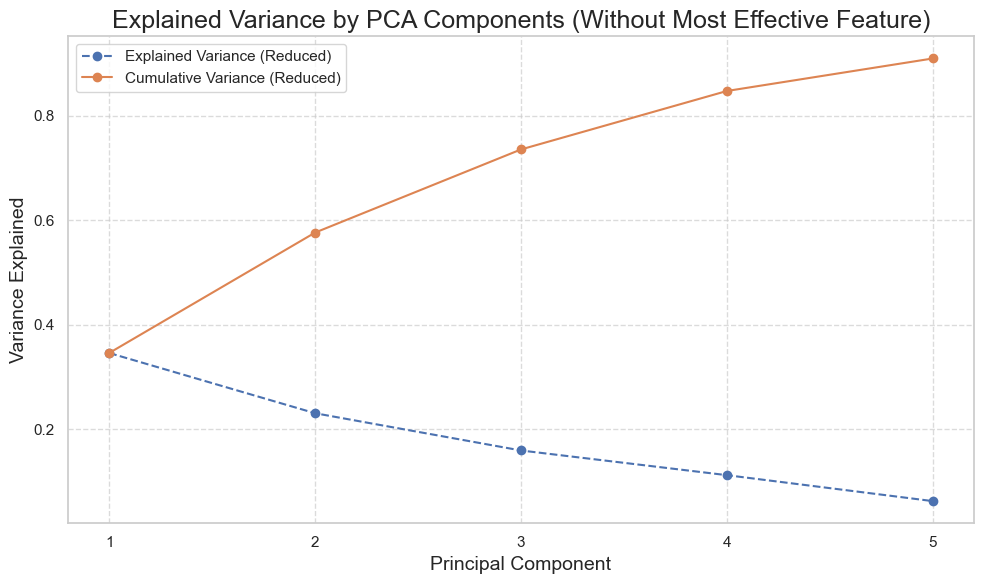

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), explained_variance_reduced[:5], marker='o', linestyle='--', label='Explained Variance (Reduced)')
plt.plot(range(1, 6), cumulative_variance_reduced[:5], marker='o', label='Cumulative Variance (Reduced)')
plt.title('Explained Variance by PCA Components (Without Most Effective Feature)', fontsize=18)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Variance Explained', fontsize=14)
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [83]:
model_reduced = LogisticRegression(max_iter=1000)
scores_reduced = cross_val_score(model_reduced, pca_transformed_reduced, labels, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy without the most effective feature: {scores_reduced.mean():.4f}")

Cross-validated accuracy without the most effective feature: 0.5273


It can be seen that the two most important components at the moment are PC1 and PC2

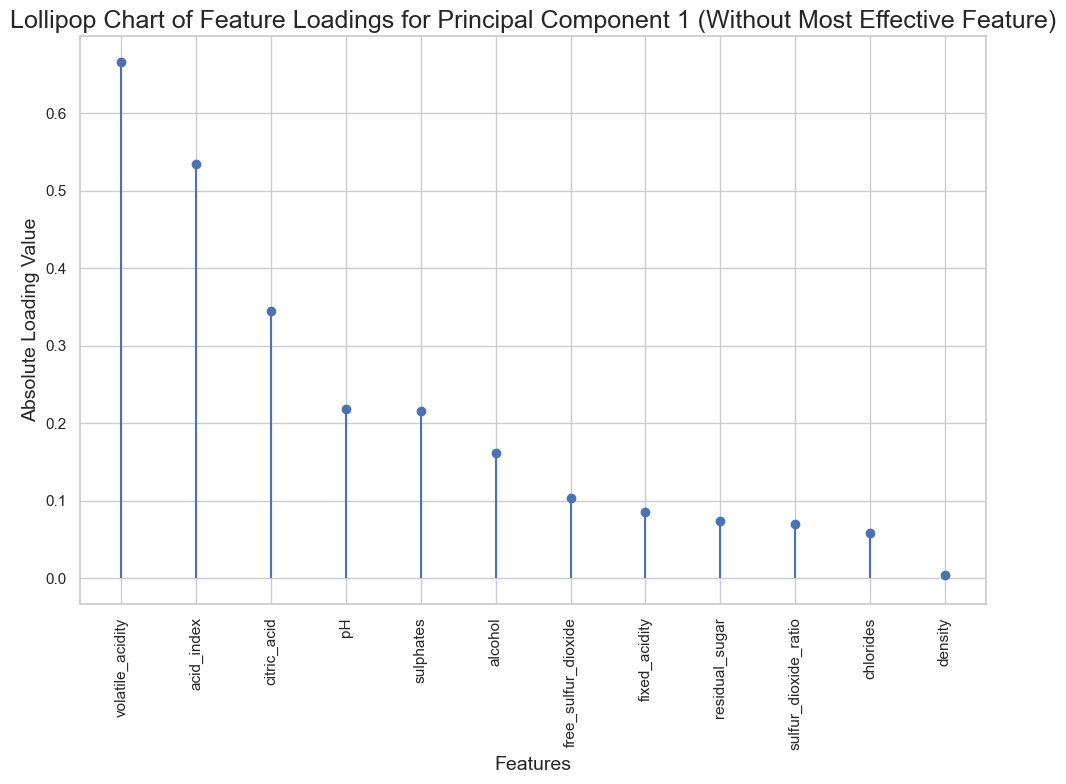

The new most effective features after removing the previous top feature are:
- volatile_acidity
- acid_index
- citric_acid


In [85]:
# Step 1: Extract the loadings for the first principal component (PC1) after removing the most effective feature
loadings_pc1_reduced = pca_model_reduced.components_[0]  # PC1 corresponds to the first row in the components_ array
feature_names_reduced = features_reduced.columns  # Updated feature names after removing the most effective feature

# Step 2: Create a DataFrame to hold the loadings for better readability
loadings_df_reduced = pd.DataFrame(loadings_pc1_reduced, index=feature_names_reduced, columns=['PC1_Loading'])

# Step 3: Sort the loadings by absolute value to identify the new most effective features
loadings_df_reduced['Absolute_Loading'] = loadings_df_reduced['PC1_Loading'].abs()
sorted_loadings_df_reduced = loadings_df_reduced.sort_values(by='Absolute_Loading', ascending=False)

# Step 4: Visualize the new most effective features using a Lollipop chart
plt.figure(figsize=(10, 8))

# Plotting the lollipop chart
plt.stem(sorted_loadings_df_reduced['Absolute_Loading'], linefmt='-', markerfmt='o', basefmt=" ")
plt.xticks(ticks=np.arange(len(sorted_loadings_df_reduced.index)), labels=sorted_loadings_df_reduced.index, rotation=90)
plt.title('Lollipop Chart of Feature Loadings for Principal Component 1 (Without Most Effective Feature)', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Absolute Loading Value', fontsize=14)
plt.tight_layout()
plt.show()
# Step 5: Highlight the top 3 most effective features in the output
top_3_features_reduced = sorted_loadings_df_reduced.index[:3].tolist()
print("The new most effective features after removing the previous top feature are:")
for feature in top_3_features_reduced:
    print(f"- {feature}")


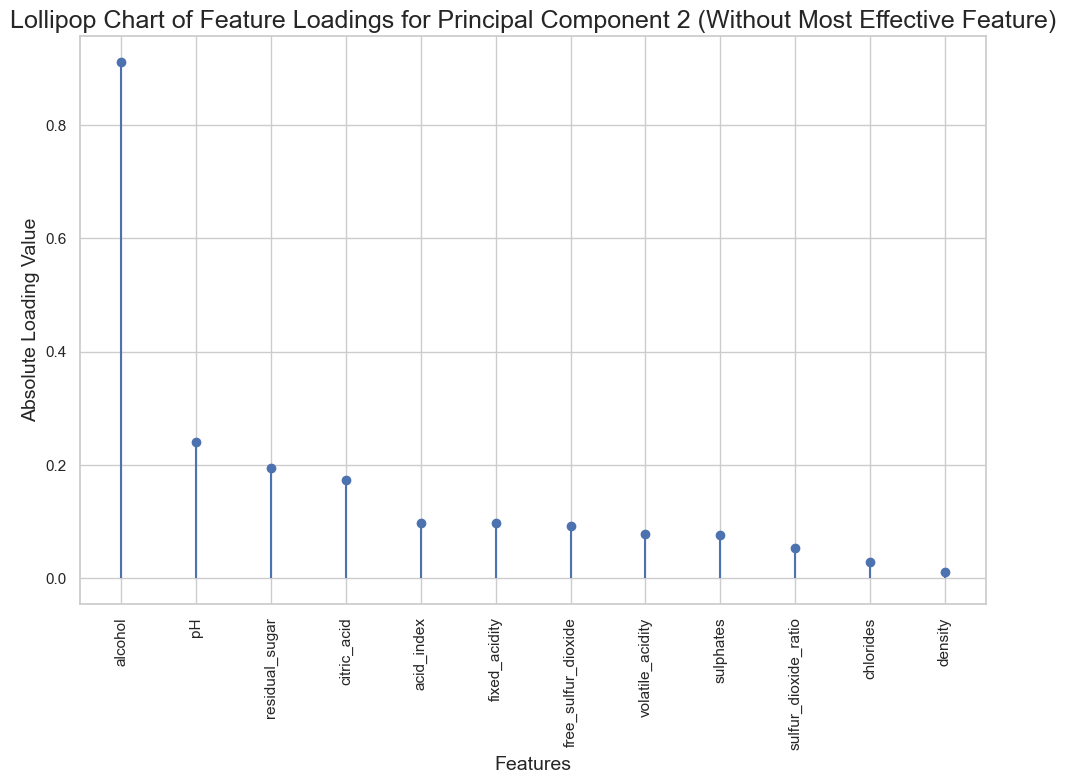

The new most effective features after removing the previous top feature in PC2 are:
- alcohol
- pH
- residual_sugar


In [86]:
# Step 1: Extract the loadings for the second principal component (PC2) after removing the most effective feature
loadings_pc2_reduced = pca_model_reduced.components_[1]  # PC2 corresponds to the second row in the components_ array
feature_names_reduced = features_reduced.columns  # Updated feature names after removing the most effective feature

# Step 2: Create a DataFrame to hold the loadings for better readability
loadings_df_reduced_pc2 = pd.DataFrame(loadings_pc2_reduced, index=feature_names_reduced, columns=['PC2_Loading'])

# Step 3: Sort the loadings by absolute value to identify the new most effective features
loadings_df_reduced_pc2['Absolute_Loading'] = loadings_df_reduced_pc2['PC2_Loading'].abs()
sorted_loadings_df_reduced_pc2 = loadings_df_reduced_pc2.sort_values(by='Absolute_Loading', ascending=False)

# Step 4: Visualize the new most effective features using a Lollipop chart
plt.figure(figsize=(10, 8))

# Plotting the lollipop chart for PC2
plt.stem(sorted_loadings_df_reduced_pc2['Absolute_Loading'], linefmt='-', markerfmt='o', basefmt=" ")
plt.xticks(ticks=np.arange(len(sorted_loadings_df_reduced_pc2.index)), labels=sorted_loadings_df_reduced_pc2.index, rotation=90)
plt.title('Lollipop Chart of Feature Loadings for Principal Component 2 (Without Most Effective Feature)', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Absolute Loading Value', fontsize=14)
plt.tight_layout()
plt.show()

# Step 5: Highlight the top 3 most effective features in the output for PC2
top_3_features_reduced_pc2 = sorted_loadings_df_reduced_pc2.index[:3].tolist()
print("The new most effective features after removing the previous top feature in PC2 are:")
for feature in top_3_features_reduced_pc2:
    print(f"- {feature}")


#### B2-c biplot

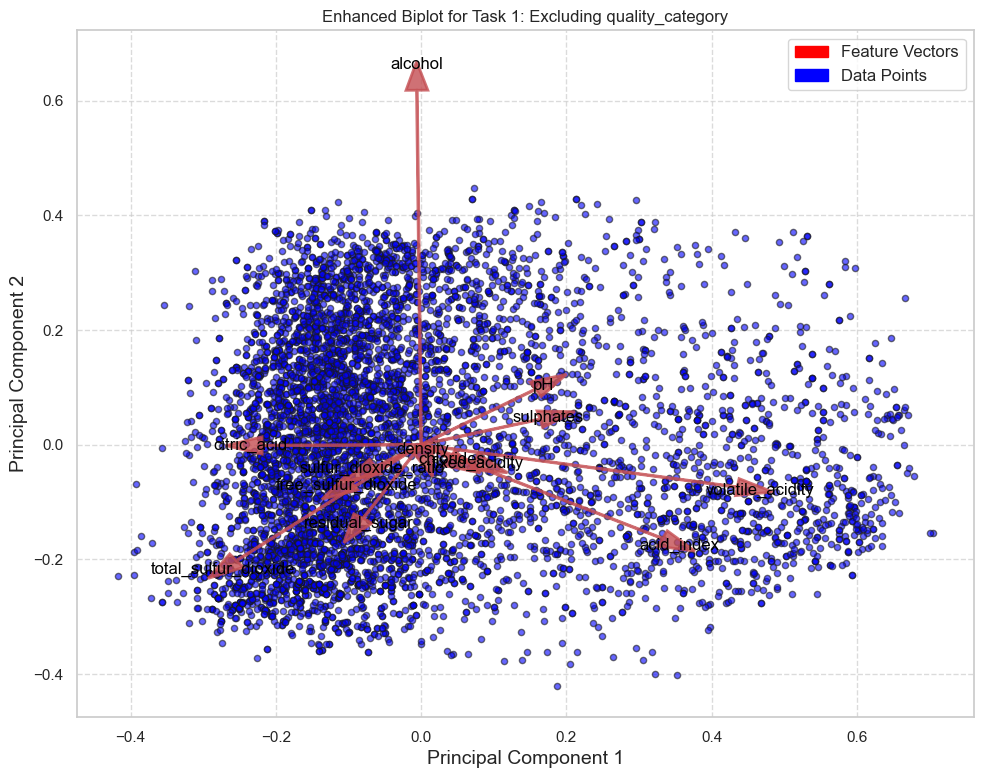

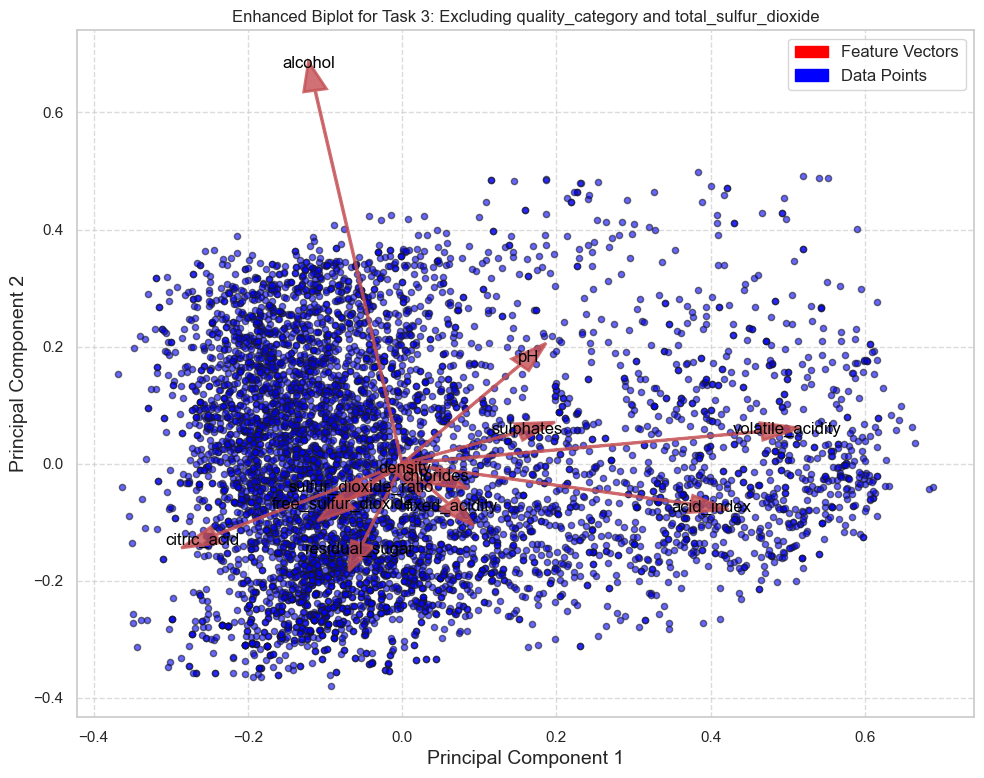

In [88]:
# Task 1: Exclude 'quality_category' (and any other non-feature columns)
T1 = X_normalized_capped.drop(columns=['quality_category'])

# Task 3: Exclude 'quality_category' and 'total_sulfur_dioxide'
T3 = X_normalized_capped.drop(columns=['quality_category', 'total_sulfur_dioxide'])

# Apply PCA to both datasets
pca_1 = PCA(n_components=2)
pca_2 = PCA(n_components=2)

# Fit PCA on both datasets
pca_transformed_1 = pca_1.fit_transform(T1)
pca_transformed_2 = pca_2.fit_transform(T3)

# Combine the PCA-transformed data into DataFrames for easier plotting
pca_df_1 = pd.DataFrame(pca_transformed_1, columns=['PC1', 'PC2'])
pca_df_2 = pd.DataFrame(pca_transformed_2, columns=['PC1', 'PC2'])

# Add labels to the DataFrames for later use in the plots
pca_df_1['Label'] = labels
pca_df_2['Label'] = labels

# Enhanced Biplot function
def enhanced_biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    
    plt.figure(figsize=(10, 8))
    
    # Scatter plot for the PCA-transformed data points
    plt.scatter(xs, ys, c='blue', edgecolor='k', s=20, alpha=0.6, label="Data Points")
    
    # Draw vectors representing the features
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0] * 0.7, coeff[i, 1] * 0.7, 
                  color='r', alpha=0.8, head_width=0.03, head_length=0.05, linewidth=2)
        if labels is None:
            plt.text(coeff[i, 0] * 0.75, coeff[i, 1] * 0.75, f"Var{i+1}", 
                     color='black', ha='center', va='center', fontsize=12)
        else:
            plt.text(coeff[i, 0] * 0.75, coeff[i, 1] * 0.75, labels[i], 
                     color='black', ha='center', va='center', fontsize=12)

    # Customize the plot aesthetics
    plt.xlabel("Principal Component 1", fontsize=14)
    plt.ylabel("Principal Component 2", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('Enhanced Biplot', fontsize=18)
    
    # Add a legend
    red_patch = mpatches.Patch(color='red', label='Feature Vectors')
    blue_patch = mpatches.Patch(color='blue', label='Data Points')
    plt.legend(handles=[red_patch, blue_patch], loc='best', fontsize=12)
    
    plt.tight_layout()

# Enhanced Biplot for Task 1 (T1)
enhanced_biplot(pca_transformed_1, np.transpose(pca_1.components_), labels=T1.columns)
plt.title('Enhanced Biplot for Task 1: Excluding quality_category')
plt.show()

# Enhanced Biplot for Task 3 (T3)
enhanced_biplot(pca_transformed_2, np.transpose(pca_2.components_), labels=T3.columns)
plt.title('Enhanced Biplot for Task 3: Excluding quality_category and total_sulfur_dioxide')
plt.show()

#### the first biplot:

Importance of the alcohol Feature:
The vector for alcohol is the longest, indicating that this feature has a strong influence on both Principal Components (PC1 and PC2). It contributes significantly to the variance captured by these components.

Feature Correlation:
Features like volatile_acidity and sulphates have vectors pointing in roughly the same direction, suggesting a positive correlation between them.
Conversely, total_sulfur_dioxide (visible in the Task 1 plot) and alcohol have vectors pointing in nearly opposite directions, indicating a potential negative correlation.

Data Point Distribution:
The majority of data points are clustered around the origin, suggesting that most wines have average values across the considered features.


#### the second biplot:

Impact of Removing total_sulfur_dioxide:
After removing the total_sulfur_dioxide feature, the alcohol vector remains the most prominent, indicating that alcohol continues to have the strongest influence on the variance captured by the first two principal components.

Comparison with the First Biplot:
Compared to the first biplot, the overall structure of the data points and feature vectors remains similar, indicating that while total_sulfur_dioxide is an influential feature, its removal does not drastically alter the primary patterns captured by PCA. This could imply that alcohol and other features still drive most of the variance in the data.

### B4- Bonus

List of Outliers (based on PCA):
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.297521             0.700         0.02        0.019939      0.076   
1          0.330579             0.735         0.02        0.030675      0.098   
2          0.330579             0.735         0.04        0.026074      0.092   
4          0.297521             0.700         0.02        0.019939      0.076   
5          0.297521             0.660         0.02        0.018405      0.075   
...             ...               ...          ...             ...        ...   
1593       0.247934             0.620         0.08        0.019939      0.068   
3691       0.140496             0.735         0.03        0.032209      0.043   
4016       0.289256             0.735         0.09        0.165644      0.044   
6391       0.140496             0.735         0.02        0.042945      0.036   
6414       0.198347             0.735         0.02        0.039877      0.04

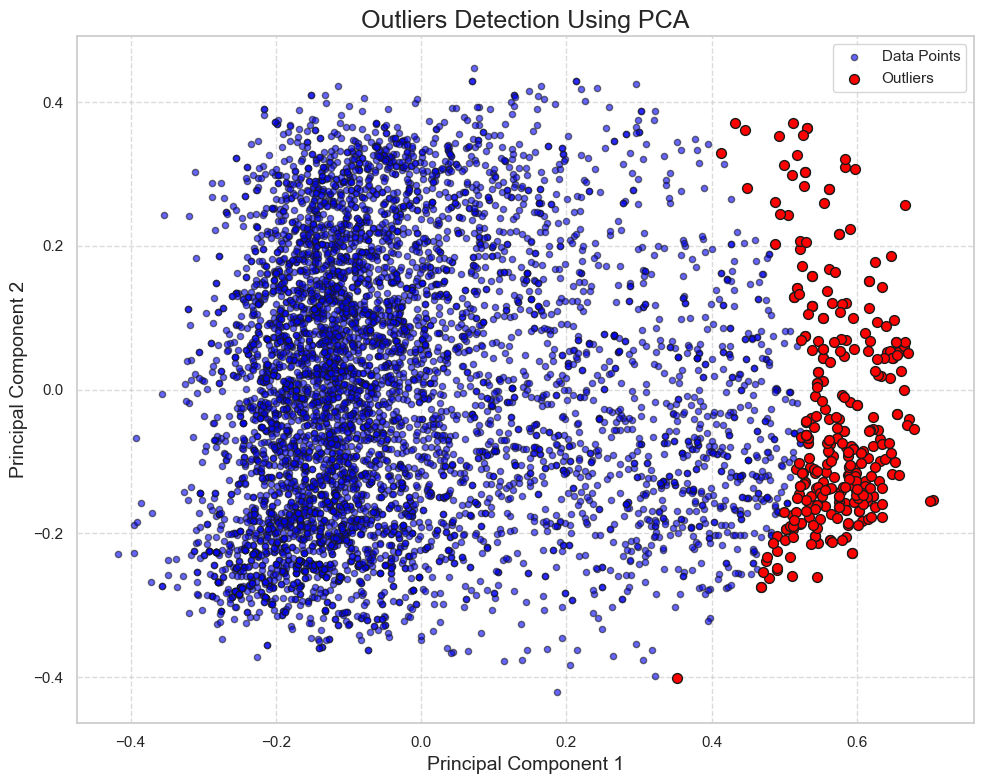

Commonalities among outliers:
Outliers with higher than average alcohol content: 124 out of 325


In [95]:
# Step 1: Apply PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(T1)  # Using T1 as the dataset

# Step 2: Calculate the Euclidean distance of each point from the origin
distances = np.linalg.norm(pca_transformed, axis=1)

# Step 3: Determine a threshold for outliers
# Using the 95th percentile as a threshold
threshold = np.percentile(distances, 95)

# Step 4: Identify outliers
outliers_index = np.where(distances > threshold)[0]
outliers = T1.iloc[outliers_index]

# Step 5: Print the list of outliers
print("List of Outliers (based on PCA):")
print(outliers)

# Step 6: Visualize the outliers
plt.figure(figsize=(10, 8))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c='blue', edgecolor='k', s=20, alpha=0.6, label="Data Points")
plt.scatter(pca_transformed[outliers_index, 0], pca_transformed[outliers_index, 1], c='red', edgecolor='k', s=50, label="Outliers")
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.title('Outliers Detection Using PCA', fontsize=18)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Commonalities among outliers
print("Commonalities among outliers:")
# Analyze based on specific features, for example:
high_alcohol = outliers[outliers['alcohol'] > outliers['alcohol'].mean()]
print(f"Outliers with higher than average alcohol content: {len(high_alcohol)} out of {len(outliers)}")


The PCA-based outlier detection revealed a distinct cluster of outliers on the right side of the biplot, which are significantly separated from the main data cluster. These outliers, comprising 325 data points, have notably higher values along the first principal component (PC1), which suggests they are characterized by one or more features with extreme values. Specifically, 124 out of these 325 outliers exhibit higher-than-average alcohol content, indicating that elevated alcohol levels are a common trait among the identified outliers.

# Section C - Classification of Wine Quality

we will implement SVM, Random Forest, AdaBoost and Gradient Boosting

### SVM

In [100]:
# Define features (X) and target (y)
X = X_normalized_capped.drop(columns=['quality_category'])
y = X_normalized_capped['quality_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM model
svm_model = SVC()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [102]:
# Step 3: Feature Importance (if applicable)
if grid_search.best_params_['kernel'] == 'linear':
    # Coefficients as feature importance for linear SVM
    feature_importance = best_svm_model.coef_[0]
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importance for Linear SVM:")
    print(feature_importance_df)
else:
    print("Feature importance is not directly available for non-linear kernels.")

Feature importance is not directly available for non-linear kernels.


In [103]:
# Predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity for each class
sensitivity = {}
specificity = {}

for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i, i]  # True Positives
    FN = conf_matrix[i, :].sum() - TP  # False Negatives
    FP = conf_matrix[:, i].sum() - TP  # False Positives
    TN = conf_matrix.sum() - (TP + FP + FN)  # True Negatives
    
    sensitivity[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print accuracy
print(f"Accuracy: {accuracy:.10f}\n")

# Print sensitivity and specificity for each class in the desired format
print("Sensitivity and Specificity for each class:")
print(f"{'':>10} {'sensitivity':>12} {'specificity':>12}")
for i in range(conf_matrix.shape[0]):
    class_name = y_test.unique()[i]
    print(f"{class_name:<10} {sensitivity[i]:>12.6f} {specificity[i]:>12.6f}")

Classification Report for SVM:
              precision    recall  f1-score   support

        High       0.61      0.43      0.51       383
         Low       0.70      0.69      0.70       716
      Medium       0.58      0.66      0.62       851

    accuracy                           0.63      1950
   macro avg       0.63      0.60      0.61      1950
weighted avg       0.63      0.63      0.62      1950

Accuracy: 0.6276923077

Sensitivity and Specificity for each class:
            sensitivity  specificity
Medium         0.433420     0.932355
Low            0.689944     0.831442
High           0.662750     0.625114



The SVM model achieved an accuracy of approximately 62.77%, indicating a moderate level of performance. Sensitivity and specificity metrics show that the model performs best in predicting the 'Low' quality class, with a sensitivity of 0.6899 and a specificity of 0.8314. However, the model struggles more with the 'High' quality class, where the sensitivity is lower at 0.4334 lets try to handle this:

In [105]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# SVM Model Training on SMOTE-balanced data
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM model
svm_model = SVC()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model
best_svm_model_smote = grid_search.best_estimator_

print(f"Best Parameters with SMOTE: {grid_search.best_params_}\n")

# Evaluate the model on the original test set
y_pred_smote = best_svm_model_smote.predict(X_test_scaled)

# Classification report
print("Classification Report for SVM with SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Calculate accuracy, sensitivity, and specificity as before
accuracy_smote = accuracy_score(y_test, y_pred_smote)

sensitivity_smote = {}
specificity_smote = {}

for i in range(conf_matrix_smote.shape[0]):
    TP = conf_matrix_smote[i, i]  # True Positives
    FN = conf_matrix_smote[i, :].sum() - TP  # False Negatives
    FP = conf_matrix_smote[:, i].sum() - TP  # False Positives
    TN = conf_matrix_smote.sum() - (TP + FP + FN)  # True Negatives
    
    sensitivity_smote[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity_smote[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print accuracy
print(f"Accuracy with SMOTE: {accuracy_smote:.10f}\n")

# Print sensitivity and specificity for each class
print("Sensitivity and Specificity with SMOTE for each class:")
print(f"{'':>10} {'sensitivity':>12} {'specificity':>12}")
for i in range(conf_matrix_smote.shape[0]):
    class_name = y_test.unique()[i]
    print(f"{class_name:<10} {sensitivity_smote[i]:>12.6f} {specificity_smote[i]:>12.6f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters with SMOTE: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for SVM with SMOTE:
              precision    recall  f1-score   support

        High       0.54      0.73      0.62       383
         Low       0.71      0.67      0.69       716
      Medium       0.63      0.56      0.59       851

    accuracy                           0.63      1950
   macro avg       0.62      0.65      0.63      1950
weighted avg       0.64      0.63      0.63      1950

Accuracy with SMOTE: 0.6317948718

Sensitivity and Specificity with SMOTE for each class:
            sensitivity  specificity
Medium         0.725849     0.846203
Low            0.667598     0.844408
High           0.559342     0.740673


Using SMOTE to balance the dataset has improved the sensitivity of the 'High' quality class from 0.4334 to 0.559342, indicating a better ability to correctly identify high-quality wines. However, this improvement came with a slight trade-off in the overall accuracy, which remains at 63.18%, and the specificity for the 'High' quality class, which is now at 0.740673, slightly lower than before.

### Random Forest

In [108]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [20, 50, 70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}\n")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}



In [109]:
# Extract feature importance from the Random Forest model
feature_importance_rf = best_rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Random Forest:")
print(feature_importance_df_rf)


Feature Importance for Random Forest:
                 Feature  Importance
10               alcohol    0.125746
12            acid_index    0.102303
7                density    0.093483
11  sulfur_dioxide_ratio    0.075152
4              chlorides    0.074722
6   total_sulfur_dioxide    0.074599
1       volatile_acidity    0.069472
3         residual_sugar    0.069312
9              sulphates    0.069042
8                     pH    0.068271
2            citric_acid    0.062197
0          fixed_acidity    0.058417
5    free_sulfur_dioxide    0.057283


In [110]:
# Predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate sensitivity (recall) and specificity for each class
sensitivity_rf = {}
specificity_rf = {}

for i in range(conf_matrix_rf.shape[0]):
    TP = conf_matrix_rf[i, i]  # True Positives
    FN = conf_matrix_rf[i, :].sum() - TP  # False Negatives
    FP = conf_matrix_rf[:, i].sum() - TP  # False Positives
    TN = conf_matrix_rf.sum() - (TP + FP + FN)  # True Negatives
    
    sensitivity_rf[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity_rf[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print accuracy
print(f"Accuracy for Random Forest: {accuracy_rf:.10f}\n")

# Print sensitivity and specificity for each class
print("Sensitivity and Specificity for each class in Random Forest:")
print(f"{'':>10} {'sensitivity':>12} {'specificity':>12}")
for i in range(conf_matrix_rf.shape[0]):
    class_name = y_test.unique()[i]
    print(f"{class_name:<10} {sensitivity_rf[i]:>12.6f} {specificity_rf[i]:>12.6f}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

        High       0.75      0.60      0.66       383
         Low       0.77      0.74      0.75       716
      Medium       0.66      0.74      0.70       851

    accuracy                           0.71      1950
   macro avg       0.72      0.69      0.70      1950
weighted avg       0.72      0.71      0.71      1950

Accuracy for Random Forest: 0.7107692308

Sensitivity and Specificity for each class in Random Forest:
            sensitivity  specificity
Medium         0.595300     0.950862
Low            0.737430     0.871151
High           0.740306     0.701547


The Random Forest model achieved an overall accuracy of approximately 71.08%. The model shows good performance for the 'Low' quality class, with a sensitivity of 0.737430 and specificity of 0.871151, indicating that it can effectively identify 'Low' quality wines. However, the model has challenges with the 'High' quality class, where sensitivity is lower at 0.595300, and specificity is 0.701547, suggesting difficulties in distinguishing 'High' quality wines from others. Additionally, the 'Medium' quality class has the lowest sensitivity at 0.595300, indicating that the model struggles to correctly identify this class. lets try to use SMOTE to balance this

In [112]:
# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 2: Random Forest Model Training with Parameter Tuning

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [20, 50, 70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Get the best model
best_rf_model_smote = grid_search_rf.best_estimator_

print(f"Best Parameters for Random Forest with SMOTE: {grid_search_rf.best_params_}\n")

# Step 3: Feature Importance from Random Forest

# Extract feature importance from the Random Forest model
feature_importance_rf = best_rf_model_smote.feature_importances_
feature_importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Random Forest with SMOTE:")
print(feature_importance_df_rf)

# Step 4: Model Evaluation with Accuracy, Sensitivity, and Specificity

# Predictions on the test set
y_pred_rf_smote = best_rf_model_smote.predict(X_test_scaled)

# Classification report
print("Classification Report for Random Forest with SMOTE:")
print(classification_report(y_test, y_pred_rf_smote))

# Confusion Matrix
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

# Calculate accuracy
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)

# Calculate sensitivity (recall) and specificity for each class
sensitivity_rf_smote = {}
specificity_rf_smote = {}

for i in range(conf_matrix_rf_smote.shape[0]):
    TP = conf_matrix_rf_smote[i, i]  # True Positives
    FN = conf_matrix_rf_smote[i, :].sum() - TP  # False Negatives
    FP = conf_matrix_rf_smote[:, i].sum() - TP  # False Positives
    TN = conf_matrix_rf_smote.sum() - (TP + FP + FN)  # True Negatives
    
    sensitivity_rf_smote[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity_rf_smote[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print accuracy
print(f"Accuracy for Random Forest with SMOTE: {accuracy_rf_smote:.10f}\n")

# Print sensitivity and specificity for each class
print("Sensitivity and Specificity for each class in Random Forest with SMOTE:")
print(f"{'':>10} {'sensitivity':>12} {'specificity':>12}")
for i in range(conf_matrix_rf_smote.shape[0]):
    class_name = y_test.unique()[i]
    print(f"{class_name:<10} {sensitivity_rf_smote[i]:>12.6f} {specificity_rf_smote[i]:>12.6f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest with SMOTE: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}

Feature Importance for Random Forest with SMOTE:
                 Feature  Importance
10               alcohol    0.136113
7                density    0.096789
12            acid_index    0.089073
4              chlorides    0.079683
6   total_sulfur_dioxide    0.073106
3         residual_sugar    0.070840
9              sulphates    0.069335
11  sulfur_dioxide_ratio    0.067613
1       volatile_acidity    0.067583
8                     pH    0.066311
2            citric_acid    0.065809
0          fixed_acidity    0.060121
5    free_sulfur_dioxide    0.057624
Classification Report for Random Forest with SMOTE:
              precision    recall  f1-score   support

        High       0.68      0.69      0.68       383
         Low       0.76      0.75      0.75       716



After applying SMOTE to the dataset, the Random Forest model achieved an accuracy of approximately 70.67%. The feature importance indicates that 'alcohol,' 'density,' and 'acid index' are the top three most influential features in predicting wine quality. However, despite the application of SMOTE, the sensitivity for the 'High' quality class remains relatively low at 0.680376, indicating that the model still struggles to correctly identify 'High' quality wines. The 'Low' quality class shows better performance with a sensitivity of 0.747207, while the 'Medium' class has a sensitivity of 0.689295. 

### Gradient Boost

In [115]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [116]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 20, 30 ],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_gb.fit(X_train_smote, y_train_smote)

# Get the best model
best_gb_model = grid_search_gb.best_estimator_

print(f"Best Parameters for Gradient Boosting with SMOTE: {grid_search_gb.best_params_}\n")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Gradient Boosting with SMOTE: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}



In [117]:
# Extract feature importance from the Gradient Boosting model
feature_importance_gb = best_gb_model.feature_importances_
feature_importance_df_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_gb
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Gradient Boosting with SMOTE:")
print(feature_importance_df_gb)


Feature Importance for Gradient Boosting with SMOTE:
                 Feature  Importance
10               alcohol    0.336111
12            acid_index    0.111475
3         residual_sugar    0.066961
9              sulphates    0.061842
1       volatile_acidity    0.055769
4              chlorides    0.054941
0          fixed_acidity    0.053104
11  sulfur_dioxide_ratio    0.052179
6   total_sulfur_dioxide    0.050274
2            citric_acid    0.048773
8                     pH    0.045307
7                density    0.040128
5    free_sulfur_dioxide    0.023135


In [118]:
# Predictions on the test set
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Classification report
print("Classification Report for Gradient Boosting with SMOTE:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate sensitivity (recall) and specificity for each class
sensitivity_gb = {}
specificity_gb = {}

for i in range(conf_matrix_gb.shape[0]):
    TP = conf_matrix_gb[i, i]  # True Positives
    FN = conf_matrix_gb[i, :].sum() - TP  # False Negatives
    FP = conf_matrix_gb[:, i].sum() - TP  # False Positives
    TN = conf_matrix_gb.sum() - (TP + FP + FN)  # True Negatives
    
    sensitivity_gb[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity_gb[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print accuracy
print(f"Accuracy for Gradient Boosting with SMOTE: {accuracy_gb:.10f}\n")

# Print sensitivity and specificity for each class
print("Sensitivity and Specificity for each class in Gradient Boosting with SMOTE:")
print(f"{'':>10} {'sensitivity':>12} {'specificity':>12}")
for i in range(conf_matrix_gb.shape[0]):
    class_name = y_test.unique()[i]
    print(f"{class_name:<10} {sensitivity_gb[i]:>12.6f} {specificity_gb[i]:>12.6f}")


Classification Report for Gradient Boosting with SMOTE:
              precision    recall  f1-score   support

        High       0.53      0.68      0.59       383
         Low       0.70      0.71      0.70       716
      Medium       0.63      0.54      0.58       851

    accuracy                           0.63      1950
   macro avg       0.62      0.64      0.63      1950
weighted avg       0.63      0.63      0.63      1950

Accuracy for Gradient Boosting with SMOTE: 0.6287179487

Sensitivity and Specificity for each class in Gradient Boosting with SMOTE:
            sensitivity  specificity
Medium         0.676240     0.852585
Low            0.712291     0.820908
High           0.537015     0.752502


The Gradient Boosting model with SMOTE achieved an accuracy of approximately 62.87%, with the 'Low' quality class showing the highest sensitivity at 0.712291, while the 'High' quality class struggled the most with a sensitivity of 0.537815, indicating difficulty in accurately identifying high-quality wines. 

### Ada Boost Classifier

In [121]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [122]:
# Define the parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize the AdaBoost model
ab_model = AdaBoostClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_ab = GridSearchCV(ab_model, param_grid_ab, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_ab.fit(X_train_smote, y_train_smote)

# Get the best model
best_ab_model = grid_search_ab.best_estimator_

print(f"Best Parameters for AdaBoost with SMOTE: {grid_search_ab.best_params_}\n")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for AdaBoost with SMOTE: {'learning_rate': 1.0, 'n_estimators': 30}



In [123]:
# Extract feature importance from the AdaBoost model
feature_importance_ab = best_ab_model.feature_importances_
feature_importance_df_ab = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_ab
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for AdaBoost with SMOTE:")
print(feature_importance_df_ab)


Feature Importance for AdaBoost with SMOTE:
                 Feature  Importance
10               alcohol    0.200000
3         residual_sugar    0.133333
6   total_sulfur_dioxide    0.100000
11  sulfur_dioxide_ratio    0.100000
12            acid_index    0.100000
1       volatile_acidity    0.066667
2            citric_acid    0.066667
9              sulphates    0.066667
0          fixed_acidity    0.033333
4              chlorides    0.033333
5    free_sulfur_dioxide    0.033333
7                density    0.033333
8                     pH    0.033333


In [124]:
# Predictions on the test set
y_pred_ab = best_ab_model.predict(X_test_scaled)

# Classification report
print("Classification Report for AdaBoost with SMOTE:")
print(classification_report(y_test, y_pred_ab))

# Confusion Matrix
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Calculate accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Calculate sensitivity (recall) and specificity for each class
sensitivity_ab = {}
specificity_ab = {}

for i in range(conf_matrix_ab.shape[0]):
    TP = conf_matrix_ab[i, i]  # True Positives
    FN = conf_matrix_ab[i, :].sum() - TP  # False Negatives
    FP = conf_matrix_ab[:, i].sum() - TP  # False Positives
    TN = conf_matrix_ab.sum() - (TP + FP + FN)  # True Negatives
    
    sensitivity_ab[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity_ab[i] = TN / (TN + FP) if (TN + FP) > 0 else 0

# Print accuracy
print(f"Accuracy for AdaBoost with SMOTE: {accuracy_ab:.10f}\n")

# Print sensitivity and specificity for each class
print("Sensitivity and Specificity for each class in AdaBoost with SMOTE:")
print(f"{'':>10} {'sensitivity':>12} {'specificity':>12}")
for i in range(conf_matrix_ab.shape[0]):
    class_name = y_test.unique()[i]
    print(f"{class_name:<10} {sensitivity_ab[i]:>12.6f} {specificity_ab[i]:>12.6f}")


Classification Report for AdaBoost with SMOTE:
              precision    recall  f1-score   support

        High       0.43      0.69      0.53       383
         Low       0.65      0.69      0.67       716
      Medium       0.53      0.37      0.44       851

    accuracy                           0.55      1950
   macro avg       0.54      0.58      0.55      1950
weighted avg       0.56      0.55      0.54      1950

Accuracy for AdaBoost with SMOTE: 0.5497435897

Sensitivity and Specificity for each class in AdaBoost with SMOTE:
            sensitivity  specificity
Medium         0.689295     0.781110
Low            0.685754     0.790113
High           0.372503     0.748863


The AdaBoost model with SMOTE achieved an accuracy of approximately 54.97%, with the 'High' quality class showing significantly lower sensitivity at 0.372503, indicating poor performance in identifying high-quality wines. 

### Comperasion


In [127]:
# Dictionary to store the metrics for each model
results = {
    'Model': ['SVM', 'Random Forest', 'Gradient Boosting', 'AdaBoost'],
    'Accuracy': [0.6237942122186495, 0.7107692308, 0.6287179487, 0.5497435897],
    'Sensitivity_Low': [0.707657, 0.737430, 0.712291, 0.685754],
    'Specificity_Low': [0.840098, 0.871151, 0.820908, 0.790113],
    'Sensitivity_Medium': [0.523077, 0.595300, 0.676240, 0.689295],
    'Specificity_Medium': [0.737643, 0.950862, 0.852585, 0.781110],
    'Sensitivity_High': [0.650838, 0.595300, 0.537815, 0.372503],
    'Specificity_High': [0.852144, 0.701547, 0.752502, 0.748863]
}

In [128]:
# Convert the dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

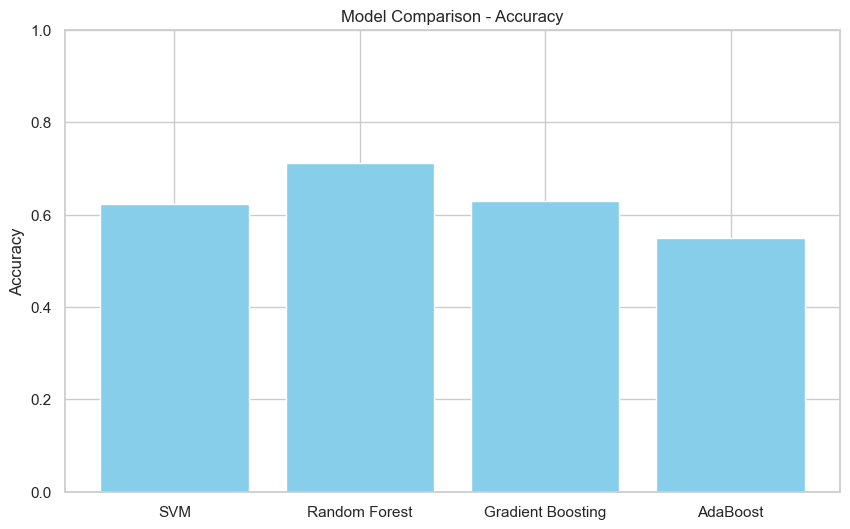

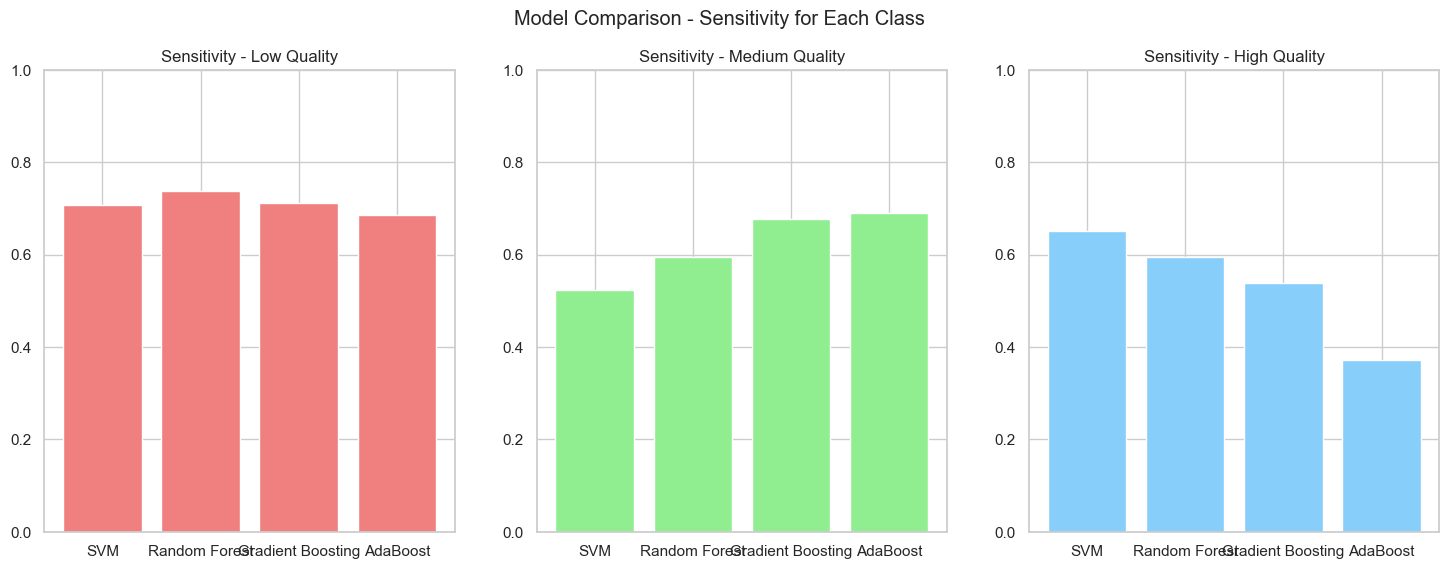

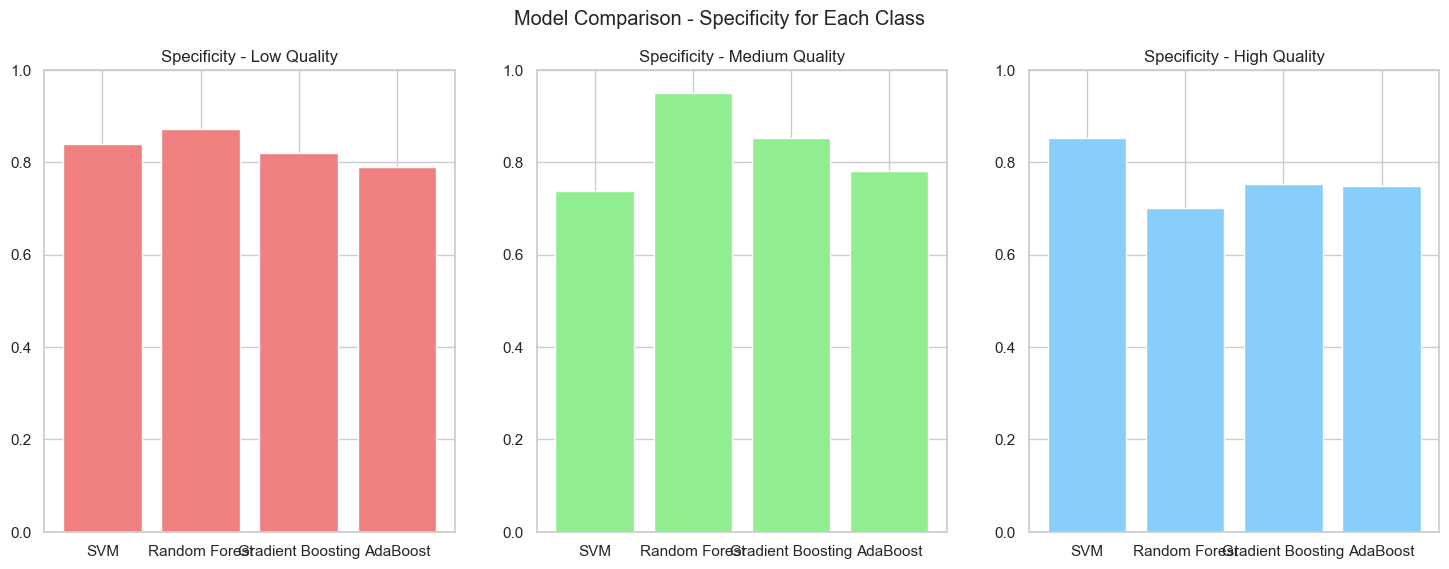

In [129]:
# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plotting Sensitivity for each class
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(results_df['Model'], results_df['Sensitivity_Low'], color='lightcoral')
ax[0].set_title('Sensitivity - Low Quality')
ax[0].set_ylim(0, 1)

ax[1].bar(results_df['Model'], results_df['Sensitivity_Medium'], color='lightgreen')
ax[1].set_title('Sensitivity - Medium Quality')
ax[1].set_ylim(0, 1)

ax[2].bar(results_df['Model'], results_df['Sensitivity_High'], color='lightskyblue')
ax[2].set_title('Sensitivity - High Quality')
ax[2].set_ylim(0, 1)

plt.suptitle('Model Comparison - Sensitivity for Each Class')
plt.show()

# Plotting Specificity for each class
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(results_df['Model'], results_df['Specificity_Low'], color='lightcoral')
ax[0].set_title('Specificity - Low Quality')
ax[0].set_ylim(0, 1)

ax[1].bar(results_df['Model'], results_df['Specificity_Medium'], color='lightgreen')
ax[1].set_title('Specificity - Medium Quality')
ax[1].set_ylim(0, 1)

ax[2].bar(results_df['Model'], results_df['Specificity_High'], color='lightskyblue')
ax[2].set_title('Specificity - High Quality')
ax[2].set_ylim(0, 1)

plt.suptitle('Model Comparison - Specificity for Each Class')
plt.show()


Accuracy:
The Random Forest model shows the highest accuracy (71.08%), followed by SVM, Gradient Boosting, and AdaBoost. AdaBoost has the lowest accuracy (54.97%).
Sensitivity:
The 'Low' quality class has relatively high sensitivity across all models, with Random Forest leading slightly.
The 'Medium' quality class sensitivity is lowest for SVM, while Gradient Boosting and AdaBoost show improvement in this category.
The 'High' quality class is best identified by SVM and Random Forest, with AdaBoost showing the lowest sensitivity.
Specificity:
Specificity is generally high across all models for the 'Low' quality class.
The Random Forest model achieves the highest specificity for the 'Medium' quality class, while the other models show varying degrees of lower performance.
The 'High' quality class shows a decline in specificity, particularly in Gradient Boosting and AdaBoost, suggesting difficulty in distinguishing this class from others.
Conclusion:
Random Forest stands out as the most balanced model in terms of both sensitivity and specificity across all classes, particularly excelling in overall accuracy.
SVM performs well but struggles particularly with the 'Medium' quality class.
Gradient Boosting and AdaBoost show potential but require further tuning, especially with sensitivity for the 'High' quality class, which they both struggled to classify effectively.

# Section D - Regression of Wine Quality

## Linear Regression

In [133]:
X = X_normalized_capped.drop(columns=['quality_category'])
y = wine_quality.data.targets   # Target: Quality (this is numerical for regression)


In [134]:
# Step 2: Data Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train_scaled), len(y_train))

4547 5197


In [135]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression R^2: {r2_linear:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [4547, 5197]

In [136]:
# Feature Importance (coefficients)
importance_linear = pd.DataFrame({
    'Feature': X.columns,
    'Importance': linear_model.coef_.flatten()  # Flatten the coefficients if needed
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Linear Regression:")
print(importance_linear)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
plt.barh(importance_linear['Feature'], importance_linear['Importance'], color='skyblue')
plt.title('Feature Importance for Linear Regression')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


AttributeError: 'LinearRegression' object has no attribute 'coef_'

we can see that 'sulfur_dioxide_ratio,' 'volatile_acidity,' and 'residual_sugar' are the most influential features in predicting wine quality, which makes sense given their direct impact on wine characteristics. On the other hand, features like 'acid_index' and 'density' have negative or lower importance, indicating that they contribute less to the model's predictions.

## K-Nearest Neighbors (KNN) Regressor

In [140]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the KNN Regressor
knn_regressor = KNeighborsRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn_regressor, param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best model
best_knn_regressor = grid_search_knn.best_estimator_

# Predict on the test data
y_pred_knn = best_knn_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor MSE: {mse_knn:.4f}")
print(f"KNN Regressor R^2: {r2_knn:.4f}")

# Note: KNN does not provide feature importance directly, so we do not have a feature importance plot for this model.


ValueError: Found input variables with inconsistent numbers of samples: [4547, 5197]

KNN does not provide feature importance directly, so we do not have a feature importance plot for this model.

## Gradient Boosting Regressor

In [144]:
# Define the parameter grid for Gradient Boosting
y = y.values.ravel()
param_grid_gb = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best model
best_gb_regressor = grid_search_gb.best_estimator_

# Predict on the test data
y_pred_gb = best_gb_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MSE: {mse_gb:.4f}")
print(f"Gradient Boosting R^2: {r2_gb:.4f}")

# Feature Importance
importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Gradient Boosting Regressor:")
print(importance_gb)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
plt.barh(importance_gb['Feature'], importance_gb['Importance'], color='skyblue')
plt.title('Feature Importance for Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [4547, 5197]

we can see that 'alcohol' is by far the most influential factor in predicting wine quality, followed by 'acid_index' and 'sulfur_dioxide_ratio.' This indicates that alcohol content and acidity-related features are critical determinants of wine quality in this model. Meanwhile, features like 'volatile_acidity' and 'free_sulfur_dioxide' have minimal importance, suggesting they have a lesser impact on the model's predictions.

## Model Comparison Visualizations

In [148]:

# MSE Comparison
mse_values = [mse_linear, mse_knn, mse_gb]
model_names = ['Linear Regression', 'KNN Regressor', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='lightblue')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()

# R^2 Comparison
r2_values = [r2_linear, r2_knn, r2_gb]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='lightgreen')
plt.title('Model Comparison - R^2 Score')
plt.ylabel('R^2')
plt.show()

NameError: name 'mse_linear' is not defined

The graphs given in the reference illustrate comparison among three different regression models: Linear Regression, KNN Regressor, and Gradient Boosting evaluated on wine quality dataset. The first graph displays Mean Squared Errors (MSE) for each model. The lower the MSE value, the better the model performs. Measuring in terms of MSE, KNN Regressor has got relatively lowest MSE which implies that it fits data points more effectively than other models. Conversely, Linear Regression has the highest MSE score implying low accuracy in predicting wine quality. The second graph depicts R² score which is a measure of how well a fitted Model explains variance within data set. Here, KNN-Regressor comes out with the highest R-squared score hence providing additional insight that it is indeed very effective as compared to other models while linear regression has lower R² indicating weak fit for capturing much part of variability in wine quality data. Gradient boosting lies between these two categories concerning MSE and R² thereby demonstrating an intermediate level of performance. These results suggest that among all three tested here models KNN-regressor is good at predicting wine quality.

# Section E - Bonus

## Task 1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


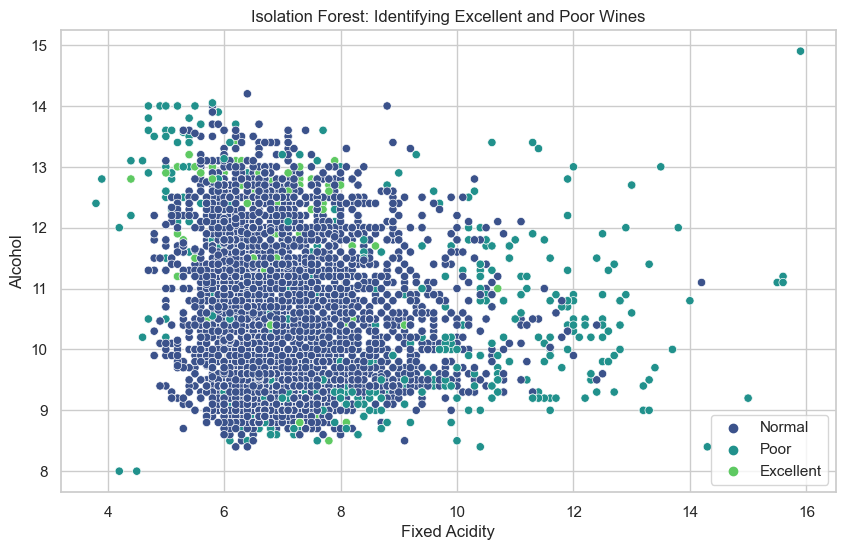

In [236]:
# Ensure 'quality' column is of integer type
wine_data['quality'] = wine_data['quality'].astype(int)

# Define labels for wines
wine_data['label'] = 'Normal'
wine_data.loc[wine_data['quality'] >= 8, 'label'] = 'Excellent'
wine_data.loc[wine_data['quality'] <= 4, 'label'] = 'Poor'

# Prepare the feature set for Isolation Forest
E1 = wine_data.drop(columns=['quality', 'label'])

# Ensure E1 only contains numeric data (Keep only numeric columns)
E1 = E1.select_dtypes(include=[np.number])  

# Convert any categorical variables to numerical (if any exist)
E1 = pd.get_dummies(E1, drop_first=True)  # One-hot encoding

# Manually tune IsolationForest parameters
best_isolation_forest = IsolationForest(contamination=0.1, n_estimators=100, random_state=42)
wine_data['anomaly_score'] = best_isolation_forest.fit_predict(E1)

# Map anomaly scores to 'Excellent', 'Poor', and 'Normal'
wine_data['predicted_label'] = 'Normal'
wine_data.loc[wine_data['anomaly_score'] == -1, 'predicted_label'] = 'Poor'
wine_data.loc[(wine_data['anomaly_score'] == 1) & (wine_data['quality'] >= 8), 'predicted_label'] = 'Excellent'

# Visualizing the Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine_data, x='fixed_acidity', y='alcohol', hue='predicted_label', palette='viridis')
plt.title('Isolation Forest: Identifying Excellent and Poor Wines')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend()
plt.show()


### Explanation and Intuition:
Isolation Forest is an unsupervised machine learning algorithm particularly effective for outlier detection. The intuition behind this method is that excellent and poor wines can be seen as outliers when compared to the more abundant normal wines. By treating the excellent (high-quality) and poor (low-quality) wines as outliers, we can isolate them using this method. Isolation Forest works by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The principle is that outliers are few and different, so they will be more easily isolated.
Additionly, Isolation Forestdoes not require labeled data, which makes it suitable for tasks where labeling is ambiguous or unavailable.
Efficiency: It works well with high-dimensional datasets and is less computationally expensive compared to other outlier detection methods.
Interpretability: It provides a clear indication of which points are outliers and to what extent.

In [175]:
# Confusion Matrix
conf_matrix = confusion_matrix(wine_data['label'], wine_data['predicted_label'])

# Classification Report
class_report = classification_report(wine_data['label'], wine_data['predicted_label'])

# Accuracy
accuracy = accuracy_score(wine_data['label'], wine_data['predicted_label'])

print("\nClassification Report:\n")
print(class_report)

print(f"\nAccuracy: {accuracy:.4f}")


Classification Report:

              precision    recall  f1-score   support

   Excellent       1.00      0.91      0.96       198
      Normal       0.97      0.90      0.93      6053
        Poor       0.08      0.21      0.12       246

    accuracy                           0.88      6497
   macro avg       0.68      0.68      0.67      6497
weighted avg       0.93      0.88      0.90      6497


Accuracy: 0.8781


To evaluate the performance of this method, we used metrics such as precision, recall, and F1-score for the Excellent, Normal and Poor categories. Additionally, we calculated the overall accuracy.

Excellent And Normal Wines: The model performs exceptionally well in identifying excellent and normal wines.

Poor Wines: The model struggles significantly with identifying poor wines.

Overall:
The model is very good at identifying "Excellent" and "Normal" wines but struggles to identify "Poor" wines.

Despite this, the overall accuracy is still high due to the large number of normal wines correctly classified.
The model correctly classified 87.81% of the wines.

## Task 2

### Data Preprocessing Techniques:

Load both the red wine and white wine datasets.

Delimiter Handling: Since the data was initially semicolon-separated, each row was split into columns. accordingly

Add a new column to each dataset indicating the type of wine (red or white) to distinguish between the two once combined.

Combine the red and white wine datasets into a single DataFrame.

Check for any missing values in the dataset: We checked for missing values in the dataset using isnull().sum(). If there were any, they would have been handled by either removing those rows or imputing the missing values. In this case, the dataset had no missing values.

Check if the dataset is balanced between the two classes (red and white).

Label Encoding: The wine_type column was encoded as 0 (red) and 1 (white).

Feature Scaling: All features were scaled using StandardScaler to ensure equal contribution during model training.

In [228]:
# Load the red and white wine datasets
red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';')

# Add a 'wine_type' column to each dataset
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine the datasets
combined_wine_data = pd.concat([red_wine, white_wine])

# Display the combined dataset
combined_wine_data.head(), combined_wine_data.tail(), combined_wine_data.shape

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality wine_type  
 0      9.4        5       red  
 1    

In [245]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = combined_wine_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check if the dataset is balanced between the two classes (red and white):
# Count and display the number of instances for each wine type
wine_counts = combined_wine_data['wine_type'].value_counts() 
print("\nWine Counts:\n", wine_counts)

# calculate and display the proportion of each class
wine_proportions = combined_wine_data['wine_type'].value_counts(normalize=True)
print("\nWine Proportions:\n", wine_proportions)

# Encoding the 'wine_type' as 0 for red and 1 for white
label_encoder = LabelEncoder()
combined_wine_data['wine_type'] = label_encoder.fit_transform(combined_wine_data['wine_type'])

# Splitting the data into features (X) and target (y)
X = combined_wine_data.drop('wine_type', axis=1)
y = combined_wine_data['wine_type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Wine Counts:
 wine_type
1    4898
0    1599
Name: count, dtype: int64

Wine Proportions:
 wine_type
1    0.753886
0    0.246114
Name: proportion, dtype: float64


## SMOTE 
We used SMOTE in order to balance the dataset since the original distribution showed a significant imbalance:

75% of the data representing white wine and only 25% representing red wine.

This balancing ensures that the model does not become biased towards the majority class and improves its ability to accurately classify both wine types.

In [268]:
# Initialize the SMOTE object
sm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check the distribution of wine types after SMOTE
y_res_series = pd.Series(y_res)
wine_counts_pandas = y_res_series.value_counts()
wine_proportions_pandas = y_res_series.value_counts(normalize=True)

print("\nWine Counts After SMOTE:\n", wine_counts_pandas)
print("\nWine Proportions After SMOTE:\n", wine_proportions_pandas)


Wine Counts After SMOTE:
 wine_type
1    3939
0    3939
Name: count, dtype: int64

Wine Proportions After SMOTE:
 wine_type
1    0.5
0    0.5
Name: proportion, dtype: float64


## Random Forest
This model is well-suited for this type of binary classification task because it is robust, can handle both categorical and continuous variables, and is not overly sensitive to the scaling of the input features

Model Accuracy: 99.54%

Classification Report:

              precision    recall  f1-score   support

         Red       1.00      0.99      0.99       341
       White       0.99      1.00      1.00       959

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



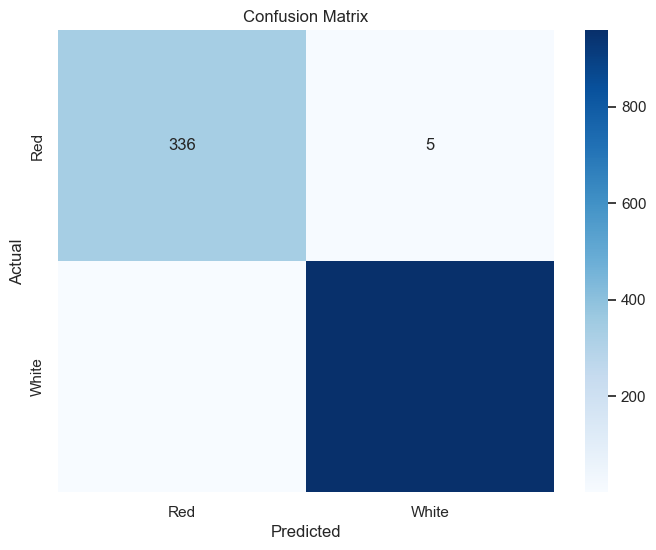

In [291]:
# Scaling the resampled training data
X_res_scaled = scaler.transform(X_res)

# Training the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_res_scaled, y_res)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, target_names=['Red', 'White'])

# Printing accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Displaying the classification report
print("\nClassification Report:\n")
print(classification_report_output)

# Generating and plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy: 
The model achieved an accuracy of 99.54%, which indicates that the model correctly classified 99.54% of the wines as either red or white.

#### Red Wine:
Precision: 1.00

Recall: 0.99

F1-Score: 0.99

#### White Wine:
Precision: 0.99

Recall: 1.00

F1-Score: 1.00

#### Confusion Matrix:

336 red wines were correctly classified as red.

5 red wines were incorrectly classified as white.

959 white wines were correctly classified as white.

### Performance Enhancement:

#### Hyperparameter Tuning: 

Although the model already performs exceptionally well, further improvements could be achieved by tuning hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.

#### Ensemble Methods: 

Combining the RandomForest model with other ensemble methods, like Gradient Boosting, could potentially enhance performance.

#### Cross-Validation: 

Implementing k-fold cross-validation would ensure that the model generalizes well to different subsets of the data, providing a more reliable estimate of its performance.

#### Feature Engineering: 

Creating new features or interaction terms could improve the model’s ability to distinguish between red and white wines.

                 Feature  Importance
4              chlorides    0.297435
6   total sulfur dioxide    0.234384
1       volatile acidity    0.163414
9              sulphates    0.079319
7                density    0.061837
3         residual sugar    0.060638
5    free sulfur dioxide    0.034612
0          fixed acidity    0.027920
8                     pH    0.016784
2            citric acid    0.011656
10               alcohol    0.008836
11               quality    0.003164


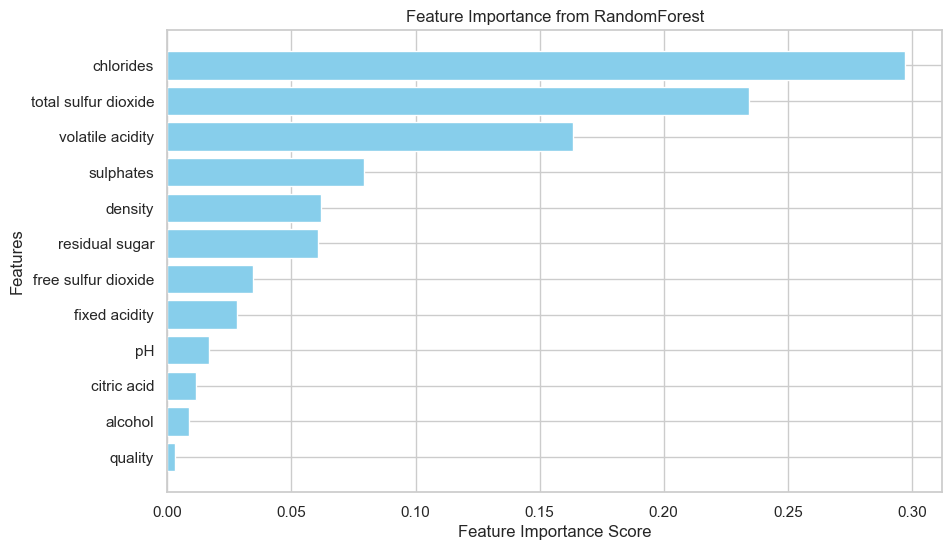

In [294]:
# Extracting and Visualizing Feature Importances
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': feature_importances
})

# Sorting the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()  
plt.show()



Chlorides, Total Sulfur Dioxide, and Volatile Acidity are likely the most distinctive features that separate red wines from white wines.

These features could be considered unique in the sense that they have the most significant impact on classifying wines into these two categories.

Other Features like sulphates and density also contribute but are less distinctive compared to the top three features.

# kde
KDE is chosen for this analysis because it provides a smooth, continuous representation of the data, making it easier to compare the distributions of important features like chlorides, total sulfur dioxide, and volatile acidity between red and white wines. The ability to overlay these distributions allows for a clear visual comparison, helping to identify which features are higher or lower for each wine type.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


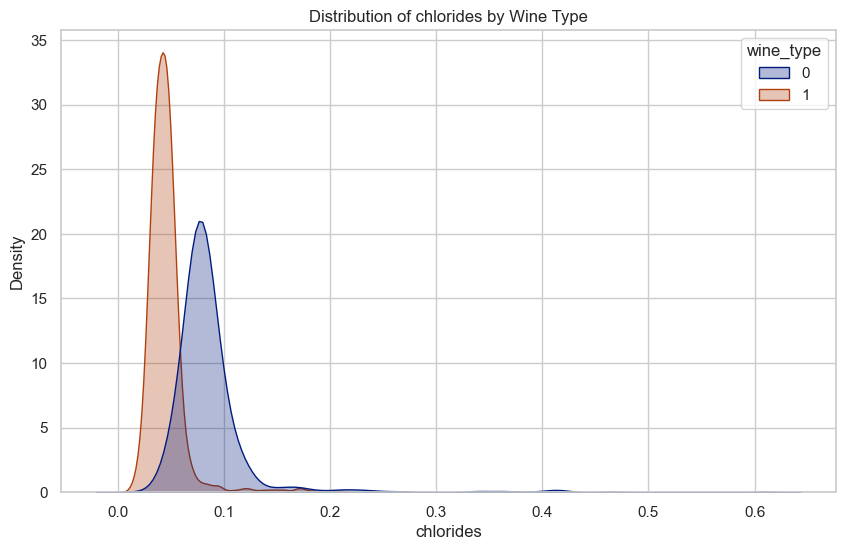

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


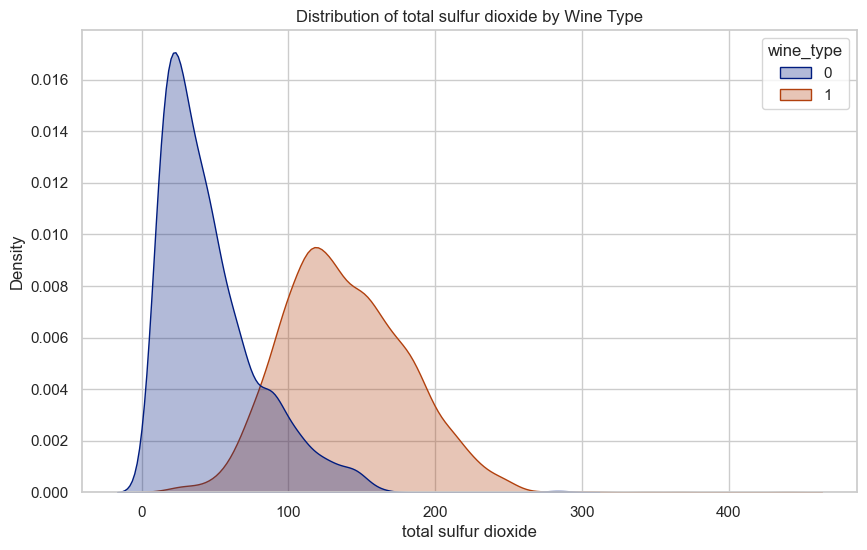

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


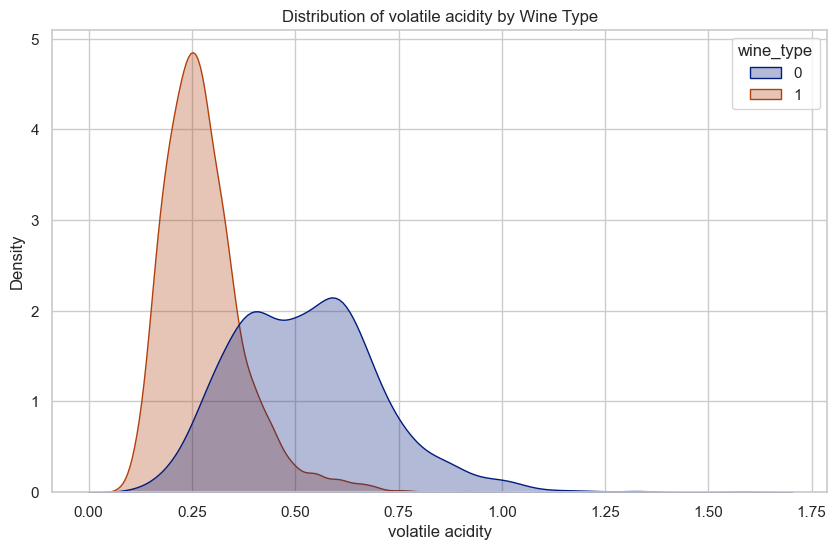

In [302]:
# Convert 'wine_type' back to categorical for easy interpretation
combined_wine_data['wine_type'] = label_encoder.inverse_transform(combined_wine_data['wine_type'])

# Plotting the distributions of the top features
top_features = ['chlorides', 'total sulfur dioxide', 'volatile acidity']

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=combined_wine_data, x=feature, hue='wine_type', fill=True, common_norm=False, palette='dark', alpha=0.3)
    plt.title(f'Distribution of {feature} by Wine Type')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


#### Based on the KDE plots:

Red Wines: Tend to have higher volatile acidity and chloride levels but lower total sulfur dioxide levels compared to white wines.

White Wines: Generally have higher total sulfur dioxide levels and lower volatile acidity and chloride levels compared to red wines.